# Predict and Classification Result

## Import Packages and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,hamming_loss

import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_test_full = pd.read_csv("../Data/Data_test_full_tfidf.csv")
data_test_nostopword = pd.read_csv("../Data/Data_test_nostopword_tfidf.csv")
data_test_nostemstop = pd.read_csv("../Data/Data_test_nostemstop_tfidf.csv")

In [2]:
data_test_nonltk = pd.read_csv("../Data/Data_test_nonltk_tfidf.csv")

In [3]:
data_test_trans_full = pd.read_csv("../Data/Data_test_trans_full_tfidf.csv")
data_test_trans_nostopword = pd.read_csv("../Data/Data_test_trans_nostopword_tfidf.csv")
data_test_trans_nostemstop = pd.read_csv("../Data/Data_test_trans_nostemstop_tfidf.csv")

In [4]:
data_val_full = pd.read_csv("../Data/Data_val_full_tfidf.csv")
data_val_nostopword = pd.read_csv("../Data/Data_val_nostopword_tfidf.csv")
data_val_nostemstop = pd.read_csv("../Data/Data_val_nostemstop_tfidf.csv")

In [5]:
data_val_trans_full = pd.read_csv("../Data/Data_val_trans_full_tfidf.csv")
data_val_trans_nostopword = pd.read_csv("../Data/Data_val_trans_nostopword_tfidf.csv")
data_val_trans_nostemstop = pd.read_csv("../Data/Data_val_trans_nostemstop_tfidf.csv")

## Features Targets Split

In [6]:
X_test_full = data_test_full.drop(['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong'],axis=1)
y_test_full = data_test_full[['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong']]

X_test_nostopword = data_test_nostopword.drop(['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong'],axis=1)
y_test_nostopword = data_test_nostopword[['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong']]

X_test_nostemstop = data_test_nostemstop.drop(['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong'],axis=1)
y_test_nostemstop = data_test_nostemstop[['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong']]

In [3]:
X_test_nonltk = data_test_nonltk.drop(['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong'],axis=1)
y_test_nonltk = data_test_nonltk[['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong']]

In [7]:
X_test_trans_full = data_test_trans_full.drop(['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong'],axis=1)
y_test_trans_full = data_test_trans_full[['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong']]

X_test_trans_nostopword = data_test_trans_nostopword.drop(['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong'],axis=1)
y_test_trans_nostopword = data_test_trans_nostopword[['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong']]

X_test_trans_nostemstop = data_test_trans_nostemstop.drop(['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong'],axis=1)
y_test_trans_nostemstop = data_test_trans_nostemstop[['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong']]

In [8]:
X_val_full = data_val_full.drop(['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong'],axis=1)
y_val_full = data_val_full[['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong']]

X_val_nostopword = data_val_nostopword.drop(['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong'],axis=1)
y_val_nostopword = data_val_nostopword[['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong']]

X_val_nostemstop = data_val_nostemstop.drop(['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong'],axis=1)
y_val_nostemstop = data_val_nostemstop[['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong']]

In [9]:
X_val_trans_full = data_val_trans_full.drop(['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong'],axis=1)
y_val_trans_full = data_val_trans_full[['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong']]

X_val_trans_nostopword = data_val_trans_nostopword.drop(['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong'],axis=1)
y_val_trans_nostopword = data_val_trans_nostopword[['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong']]

X_val_trans_nostemstop = data_val_trans_nostemstop.drop(['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong'],axis=1)
y_val_trans_nostemstop = data_val_trans_nostemstop[['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong']]

## Predict Data Test

### Classifier Chains

In [10]:
filename_full = "../Model/CC_model_full.sav"
filename_nostopword = "../Model/CC_model_nostopword.sav"
filename_nostemstop = "../Model/CC_model_nostemstop.sav"
filename_trans_full = "../Model/CC_model_trans_full.sav"
filename_trans_nostopword = "../Model/CC_model_trans_nostopword.sav"
filename_trans_nostemstop = "../Model/CC_model_trans_nostemstop.sav"

In [9]:
filename_nonltk = "../Model/CC_model_nonltk.sav"

In [10]:
model = pickle.load(open(filename_nonltk, 'rb'))
pred_CC_nonltk = model.predict(X_test_nonltk)

In [11]:
model = pickle.load(open(filename_full, 'rb'))
pred_CC_full = model.predict(X_test_full)
predval_CC_full = model.predict(X_val_full)

model = pickle.load(open(filename_nostopword, 'rb'))
pred_CC_nostopword = model.predict(X_test_nostopword)
predval_CC_nostopword = model.predict(X_val_nostopword)

model = pickle.load(open(filename_nostemstop, 'rb'))
pred_CC_nostemstop = model.predict(X_test_nostemstop)
predval_CC_nostemstop = model.predict(X_val_nostemstop)

model = pickle.load(open(filename_trans_full, 'rb'))
pred_CC_trans_full = model.predict(X_test_trans_full)
predval_CC_trans_full = model.predict(X_val_trans_full)

model = pickle.load(open(filename_trans_nostopword, 'rb'))
pred_CC_trans_nostopword = model.predict(X_test_trans_nostopword)
predval_CC_trans_nostopword = model.predict(X_val_trans_nostopword)

model = pickle.load(open(filename_trans_nostemstop, 'rb'))
pred_CC_trans_nostemstop = model.predict(X_test_trans_nostemstop)
predval_CC_trans_nostemstop = model.predict(X_val_trans_nostemstop)

FileNotFoundError: [Errno 2] No such file or directory: '../Model/CC_model_nostemstop.sav'

### Label Powerset

In [21]:
filename_full = "../Model/LP_model_full.sav"
filename_nostopword = "../Model/LP_model_nostopword.sav"
filename_nostemstop = "../Model/LP_model_nostemstop.sav"
filename_trans_full = "../Model/LP_model_trans_full.sav"
filename_trans_nostopword = "../Model/LP_model_trans_nostopword.sav"
filename_trans_nostemstop = "../Model/LP_model_trans_nostemstop.sav"

In [22]:
model = pickle.load(open(filename_full, 'rb'))
pred_LP_full = model.predict(X_test_full)
predval_LP_full = model.predict(X_val_full)

model = pickle.load(open(filename_nostopword, 'rb'))
pred_LP_nostopword = model.predict(X_test_nostopword)
predval_LP_nostopword = model.predict(X_val_nostopword)

model = pickle.load(open(filename_nostemstop, 'rb'))
pred_LP_nostemstop = model.predict(X_test_nostemstop)
predval_LP_nostemstop = model.predict(X_val_nostemstop)

model = pickle.load(open(filename_trans_full, 'rb'))
pred_LP_trans_full = model.predict(X_test_trans_full)
predval_LP_trans_full = model.predict(X_val_trans_full)

model = pickle.load(open(filename_trans_nostopword, 'rb'))
pred_LP_trans_nostopword = model.predict(X_test_trans_nostopword)
predval_LP_trans_nostopword = model.predict(X_val_trans_nostopword)

model = pickle.load(open(filename_trans_nostemstop, 'rb'))
pred_LP_trans_nostemstop = model.predict(X_test_trans_nostemstop)
predval_LP_trans_nostemstop = model.predict(X_val_trans_nostemstop)

### Binary Relevance (for best scenario only)

In [12]:
filename_nostemstop = "../Model/BR_model_nostemstop.sav"

In [13]:
model = pickle.load(open(filename_nostemstop, 'rb'))
pred_BR_nostemstop = model.predict(X_test_nostemstop)
predval_BR_nostemstop = model.predict(X_val_nostemstop)

## Evaluation

In [6]:
def labelSetAccuracy(y_true, y_pred):
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
#         print('\nset_true: {0}'.format(set_true))
#         print('set_pred: {0}'.format(set_pred))
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )
        #print('tmp_a: {0}'.format(tmp_a))
        acc_list.append(tmp_a)
    return np.mean(acc_list)

### Classifier Chains

- **Data Validation**

In [15]:
labelSetAcc_CC_full_val = labelSetAccuracy(y_val_full.values,predval_CC_full.toarray())
exactAcc_CC_full_val = accuracy_score(y_val_full,predval_CC_full)
haml_CC_full_val = hamming_loss(y_val_full,predval_CC_full)

In [16]:
print("label base accuracy = ", labelSetAcc_CC_full_val)
print("exact match accuracy = ", exactAcc_CC_full_val)
print("hamming loss = ", haml_CC_full_val)

label base accuracy =  0.7347486413043479
exact match accuracy =  0.65625
hamming loss =  0.10456295289855072


In [17]:
labelSetAcc_CC_nostopword_val = labelSetAccuracy(y_val_nostopword.values,predval_CC_nostopword.toarray())
exactAcc_CC_nostopword_val = accuracy_score(y_val_nostopword,predval_CC_nostopword)
haml_CC_nostopword_val = hamming_loss(y_val_nostopword,predval_CC_nostopword)

In [18]:
print("label base accuracy = ", labelSetAcc_CC_nostopword_val)
print("exact match accuracy = ", exactAcc_CC_nostopword_val)
print("hamming loss = ", haml_CC_nostopword_val)

label base accuracy =  0.7524133022774326
exact match accuracy =  0.6820652173913043
hamming loss =  0.09482563405797101


In [19]:
labelSetAcc_CC_nostemstop_val = labelSetAccuracy(y_val_nostemstop.values,predval_CC_nostemstop.toarray())
exactAcc_CC_nostemstop_val = accuracy_score(y_val_nostemstop,predval_CC_nostemstop)
haml_CC_nostemstop_val = hamming_loss(y_val_nostemstop,predval_CC_nostemstop)

In [20]:
print("label base accuracy = ", labelSetAcc_CC_nostemstop_val)
print("exact match accuracy = ", exactAcc_CC_nostemstop_val)
print("hamming loss = ", haml_CC_nostemstop_val)

label base accuracy =  0.7466930318322981
exact match accuracy =  0.6745923913043478
hamming loss =  0.09748641304347826


In [21]:
labelSetAcc_CC_trans_full_val = labelSetAccuracy(y_val_trans_full.values,predval_CC_trans_full.toarray())
exactAcc_CC_trans_full_val = accuracy_score(y_val_trans_full,predval_CC_trans_full)
haml_CC_trans_full_val = hamming_loss(y_val_trans_full,predval_CC_trans_full)

In [22]:
print("label base accuracy = ", labelSetAcc_CC_trans_full_val)
print("exact match accuracy = ", exactAcc_CC_trans_full_val)
print("hamming loss = ", haml_CC_trans_full_val)

label base accuracy =  0.7157705745341616
exact match accuracy =  0.641983695652174
hamming loss =  0.10858242753623189


In [23]:
labelSetAcc_CC_trans_nostopword_val = labelSetAccuracy(y_val_trans_nostopword.values,predval_CC_trans_nostopword.toarray())
exactAcc_CC_trans_nostopword_val = accuracy_score(y_val_trans_nostopword,predval_CC_trans_nostopword)
haml_CC_trans_nostopword_val = hamming_loss(y_val_trans_nostopword,predval_CC_trans_nostopword)

In [24]:
print("label base accuracy = ", labelSetAcc_CC_trans_nostopword_val)
print("exact match accuracy = ", exactAcc_CC_trans_nostopword_val)
print("hamming loss = ", haml_CC_trans_nostopword_val)

label base accuracy =  0.6888797230848862
exact match accuracy =  0.6134510869565217
hamming loss =  0.11650815217391304


In [25]:
labelSetAcc_CC_trans_nostemstop_val = labelSetAccuracy(y_val_trans_nostemstop.values,predval_CC_trans_nostemstop.toarray())
exactAcc_CC_trans_nostemstop_val = accuracy_score(y_val_trans_nostemstop,predval_CC_trans_nostemstop)
haml_CC_trans_nostemstop_val = hamming_loss(y_val_trans_nostemstop,predval_CC_trans_nostemstop)

In [26]:
print("label base accuracy = ", labelSetAcc_CC_trans_nostemstop_val)
print("exact match accuracy = ", exactAcc_CC_trans_nostemstop_val)
print("hamming loss = ", haml_CC_trans_nostemstop_val)

label base accuracy =  0.6735952057453416
exact match accuracy =  0.6005434782608695
hamming loss =  0.12030117753623189


- **Data Test**

In [27]:
labelSetAcc_CC_full = labelSetAccuracy(y_test_full.values,pred_CC_full.toarray())
exactAcc_CC_full = accuracy_score(y_test_full,pred_CC_full)
haml_CC_full = hamming_loss(y_test_full,pred_CC_full)

In [28]:
print("label base accuracy = ", labelSetAcc_CC_full)
print("exact match accuracy = ", exactAcc_CC_full)
print("hamming loss = ", haml_CC_full)

label base accuracy =  0.7453005305383023
exact match accuracy =  0.675
hamming loss =  0.09590126811594203


In [11]:
labelSetAcc_CC_nonltk = labelSetAccuracy(y_test_nonltk.values,pred_CC_nonltk.toarray())
exactAcc_CC_nonltk = accuracy_score(y_test_nonltk,pred_CC_nonltk)
haml_CC_nonltk = hamming_loss(y_test_nonltk,pred_CC_nonltk)

In [12]:
print("label base accuracy = ", labelSetAcc_CC_nonltk)
print("exact match accuracy = ", exactAcc_CC_nonltk)
print("hamming loss = ", haml_CC_nonltk)

label base accuracy =  0.7603697593167702
exact match accuracy =  0.6929347826086957
hamming loss =  0.0896286231884058


In [29]:
labelSetAcc_CC_nostopword = labelSetAccuracy(y_test_nostopword.values,pred_CC_nostopword.toarray())
exactAcc_CC_nostopword = accuracy_score(y_test_nostopword,pred_CC_nostopword)
haml_CC_nostopword = hamming_loss(y_test_nostopword,pred_CC_nostopword)

In [30]:
print("label base accuracy = ", labelSetAcc_CC_nostopword)
print("exact match accuracy = ", exactAcc_CC_nostopword)
print("hamming loss = ", haml_CC_nostopword)

label base accuracy =  0.7565075051759835
exact match accuracy =  0.6907608695652174
hamming loss =  0.08969655797101449


In [31]:
labelSetAcc_CC_nostemstop = labelSetAccuracy(y_test_nostemstop.values,pred_CC_nostemstop.toarray())
exactAcc_CC_nostemstop = accuracy_score(y_test_nostemstop,pred_CC_nostemstop)
haml_CC_nostemstop = hamming_loss(y_test_nostemstop,pred_CC_nostemstop)

In [32]:
print("label base accuracy = ", labelSetAcc_CC_nostemstop)
print("exact match accuracy = ", exactAcc_CC_nostemstop)
print("hamming loss = ", haml_CC_nostemstop)

label base accuracy =  0.7611901526915115
exact match accuracy =  0.6970108695652174
hamming loss =  0.08768115942028985


In [33]:
labelSetAcc_CC_trans_full = labelSetAccuracy(y_test_trans_full.values,pred_CC_trans_full.toarray())
exactAcc_CC_trans_full = accuracy_score(y_test_trans_full,pred_CC_trans_full)
haml_CC_trans_full = hamming_loss(y_test_trans_full,pred_CC_trans_full)

In [34]:
print("label base accuracy = ", labelSetAcc_CC_trans_full)
print("exact match accuracy = ", exactAcc_CC_trans_full)
print("hamming loss = ", haml_CC_trans_full)

label base accuracy =  0.7209155020703932
exact match accuracy =  0.6470108695652174
hamming loss =  0.10339673913043479


In [35]:
labelSetAcc_CC_trans_nostopword = labelSetAccuracy(y_test_trans_nostopword.values,pred_CC_trans_nostopword.toarray())
exactAcc_CC_trans_nostopword = accuracy_score(y_test_trans_nostopword,pred_CC_trans_nostopword)
haml_CC_trans_nostopword = hamming_loss(y_test_trans_nostopword,pred_CC_trans_nostopword)

In [36]:
print("label base accuracy = ", labelSetAcc_CC_trans_nostopword)
print("exact match accuracy = ", exactAcc_CC_trans_nostopword)
print("hamming loss = ", haml_CC_trans_nostopword)

label base accuracy =  0.7336451863354038
exact match accuracy =  0.6679347826086957
hamming loss =  0.09526721014492753


In [37]:
labelSetAcc_CC_trans_nostemstop = labelSetAccuracy(y_test_trans_nostemstop.values,pred_CC_trans_nostemstop.toarray())
exactAcc_CC_trans_nostemstop = accuracy_score(y_test_trans_nostemstop,pred_CC_trans_nostemstop)
haml_CC_trans_nostemstop = hamming_loss(y_test_trans_nostemstop,pred_CC_trans_nostemstop)

In [38]:
print("label base accuracy = ", labelSetAcc_CC_trans_nostemstop)
print("exact match accuracy = ", exactAcc_CC_trans_nostemstop)
print("hamming loss = ", haml_CC_trans_nostemstop)

label base accuracy =  0.7408120902346446
exact match accuracy =  0.6752717391304348
hamming loss =  0.09336503623188405


### Label Powerset

- **Data Validation**

In [39]:
labelSetAcc_LP_full_val = labelSetAccuracy(y_val_full.values,predval_LP_full.toarray())
exactAcc_LP_full_val = accuracy_score(y_val_full,predval_LP_full)
haml_LP_full_val = hamming_loss(y_val_full,predval_LP_full)

In [40]:
print("label base accuracy = ", labelSetAcc_LP_full_val)
print("exact match accuracy = ", exactAcc_LP_full_val)
print("hamming loss = ", haml_LP_full_val)

label base accuracy =  0.7232975866977225
exact match accuracy =  0.6671195652173914
hamming loss =  0.10422327898550725


In [41]:
labelSetAcc_LP_nostopword_val = labelSetAccuracy(y_val_nostopword.values,predval_LP_nostopword.toarray())
exactAcc_LP_nostopword_val = accuracy_score(y_val_nostopword,predval_LP_nostopword)
haml_LP_nostopword_val = hamming_loss(y_val_nostopword,predval_LP_nostopword)

In [42]:
print("label base accuracy = ", labelSetAcc_LP_nostopword_val)
print("exact match accuracy = ", exactAcc_LP_nostopword_val)
print("hamming loss = ", haml_LP_nostopword_val)

label base accuracy =  0.7121239324534162
exact match accuracy =  0.6650815217391305
hamming loss =  0.1051856884057971


In [23]:
labelSetAcc_LP_nostemstop_val = labelSetAccuracy(y_val_nostemstop.values,predval_LP_nostemstop.toarray())
exactAcc_LP_nostemstop_val = accuracy_score(y_val_nostemstop,predval_LP_nostemstop)
haml_LP_nostemstop_val = hamming_loss(y_val_nostemstop,predval_LP_nostemstop)

In [44]:
print("label base accuracy = ", labelSetAcc_LP_nostemstop_val)
print("exact match accuracy = ", exactAcc_LP_nostemstop_val)
print("hamming loss = ", haml_LP_nostemstop_val)

label base accuracy =  0.7193153144409937
exact match accuracy =  0.6691576086956522
hamming loss =  0.10309103260869565


In [24]:
print("label base accuracy = ", labelSetAcc_LP_nostemstop_val)
print("exact match accuracy = ", exactAcc_LP_nostemstop_val)
print("hamming loss = ", haml_LP_nostemstop_val)

label base accuracy =  0.7197989453933747
exact match accuracy =  0.6691576086956522
hamming loss =  0.10348731884057971


In [45]:
labelSetAcc_LP_trans_full_val = labelSetAccuracy(y_val_trans_full.values,predval_LP_trans_full.toarray())
exactAcc_LP_trans_full_val = accuracy_score(y_val_trans_full,predval_LP_trans_full)
haml_LP_trans_full_val = hamming_loss(y_val_trans_full,predval_LP_trans_full)

In [46]:
print("label base accuracy = ", labelSetAcc_LP_trans_full_val)
print("exact match accuracy = ", exactAcc_LP_trans_full_val)
print("hamming loss = ", haml_LP_trans_full_val)

label base accuracy =  0.7059386322463768
exact match accuracy =  0.6514945652173914
hamming loss =  0.1096580615942029


In [47]:
labelSetAcc_LP_trans_nostopword_val = labelSetAccuracy(y_val_trans_nostopword.values,predval_LP_trans_nostopword.toarray())
exactAcc_LP_trans_nostopword_val = accuracy_score(y_val_trans_nostopword,predval_LP_trans_nostopword)
haml_LP_trans_nostopword_val = hamming_loss(y_val_trans_nostopword,predval_LP_trans_nostopword)

In [48]:
print("label base accuracy = ", labelSetAcc_LP_trans_nostopword_val)
print("exact match accuracy = ", exactAcc_LP_trans_nostopword_val)
print("hamming loss = ", haml_LP_trans_nostopword_val)

label base accuracy =  0.6558375388198757
exact match accuracy =  0.6046195652173914
hamming loss =  0.12273550724637682


In [49]:
labelSetAcc_LP_trans_nostemstop_val = labelSetAccuracy(y_val_trans_nostemstop.values,predval_LP_trans_nostemstop.toarray())
exactAcc_LP_trans_nostemstop_val = accuracy_score(y_val_trans_nostemstop,predval_LP_trans_nostemstop)
haml_LP_trans_nostemstop_val = hamming_loss(y_val_trans_nostemstop,predval_LP_trans_nostemstop)

In [50]:
print("label base accuracy = ", labelSetAcc_LP_trans_nostemstop_val)
print("exact match accuracy = ", exactAcc_LP_trans_nostemstop_val)
print("hamming loss = ", haml_LP_trans_nostemstop_val)

label base accuracy =  0.6325342908902691
exact match accuracy =  0.5855978260869565
hamming loss =  0.13003849637681159


- **Data Test**

In [51]:
labelSetAcc_LP_full = labelSetAccuracy(y_test_full.values,pred_LP_full.toarray())
exactAcc_LP_full = accuracy_score(y_test_full,pred_LP_full)
haml_LP_full = hamming_loss(y_test_full,pred_LP_full)

In [52]:
print("label base accuracy = ", labelSetAcc_LP_full)
print("exact match accuracy = ", exactAcc_LP_full)
print("hamming loss = ", haml_LP_full)

label base accuracy =  0.7312875258799171
exact match accuracy =  0.6779891304347826
hamming loss =  0.09780344202898551


In [53]:
labelSetAcc_LP_nostopword = labelSetAccuracy(y_test_nostopword.values,pred_LP_nostopword.toarray())
exactAcc_LP_nostopword = accuracy_score(y_test_nostopword,pred_LP_nostopword)
haml_LP_nostopword = hamming_loss(y_test_nostopword,pred_LP_nostopword)

In [54]:
print("label base accuracy = ", labelSetAcc_LP_nostopword)
print("exact match accuracy = ", exactAcc_LP_nostopword)
print("hamming loss = ", haml_LP_nostopword)

label base accuracy =  0.7116894194271911
exact match accuracy =  0.6698369565217391
hamming loss =  0.10133605072463768


In [25]:
labelSetAcc_LP_nostemstop = labelSetAccuracy(y_test_nostemstop.values,pred_LP_nostemstop.toarray())
exactAcc_LP_nostemstop = accuracy_score(y_test_nostemstop,pred_LP_nostemstop)
haml_LP_nostemstop = hamming_loss(y_test_nostemstop,pred_LP_nostemstop)

In [56]:
print("label base accuracy = ", labelSetAcc_LP_nostemstop)
print("exact match accuracy = ", exactAcc_LP_nostemstop)
print("hamming loss = ", haml_LP_nostemstop)

label base accuracy =  0.7194692460317459
exact match accuracy =  0.6758152173913043
hamming loss =  0.09923007246376811


In [57]:
labelSetAcc_LP_trans_full = labelSetAccuracy(y_test_trans_full.values,pred_LP_trans_full.toarray())
exactAcc_LP_trans_full = accuracy_score(y_test_trans_full,pred_LP_trans_full)
haml_LP_trans_full = hamming_loss(y_test_trans_full,pred_LP_trans_full)

In [58]:
print("label base accuracy = ", labelSetAcc_LP_trans_full)
print("exact match accuracy = ", exactAcc_LP_trans_full)
print("hamming loss = ", haml_LP_trans_full)

label base accuracy =  0.7104085791925466
exact match accuracy =  0.6570652173913043
hamming loss =  0.10407608695652174


In [59]:
labelSetAcc_LP_trans_nostopword = labelSetAccuracy(y_test_trans_nostopword.values,pred_LP_trans_nostopword.toarray())
exactAcc_LP_trans_nostopword = accuracy_score(y_test_trans_nostopword,pred_LP_trans_nostopword)
haml_LP_trans_nostopword = hamming_loss(y_test_trans_nostopword,pred_LP_trans_nostopword)

In [60]:
print("label base accuracy = ", labelSetAcc_LP_trans_nostopword)
print("exact match accuracy = ", exactAcc_LP_trans_nostopword)
print("hamming loss = ", haml_LP_trans_nostopword)

label base accuracy =  0.69775211352657
exact match accuracy =  0.6554347826086957
hamming loss =  0.10480072463768116


In [61]:
labelSetAcc_LP_trans_nostemstop = labelSetAccuracy(y_test_trans_nostemstop.values,pred_LP_trans_nostemstop.toarray())
exactAcc_LP_trans_nostemstop = accuracy_score(y_test_trans_nostemstop,pred_LP_trans_nostemstop)
haml_LP_trans_nostemstop = hamming_loss(y_test_trans_nostemstop,pred_LP_trans_nostemstop)

In [62]:
print("label base accuracy = ", labelSetAcc_LP_trans_nostemstop)
print("exact match accuracy = ", exactAcc_LP_trans_nostemstop)
print("hamming loss = ", haml_LP_trans_nostemstop)

label base accuracy =  0.702788345410628
exact match accuracy =  0.6595108695652174
hamming loss =  0.10285326086956521


### Binary Relevance (for best scenario only)

- **Data Validation**

In [15]:
labelSetAcc_BR_nostemstop_val = labelSetAccuracy(y_val_nostemstop.values,predval_BR_nostemstop.toarray())
exactAcc_BR_nostemstop_val = accuracy_score(y_val_nostemstop,predval_BR_nostemstop)
haml_BR_nostemstop_val = hamming_loss(y_val_nostemstop,predval_BR_nostemstop)

In [19]:
print("label base accuracy = ", labelSetAcc_BR_nostemstop_val)
print("exact match accuracy = ", exactAcc_BR_nostemstop_val)
print("hamming loss = ", haml_BR_nostemstop_val)

label base accuracy =  0.6735394021739131
exact match accuracy =  0.5475543478260869
hamming loss =  0.10609148550724638


- **Data Test**

In [17]:
labelSetAcc_BR_nostemstop = labelSetAccuracy(y_test_nostemstop.values,pred_BR_nostemstop.toarray())
exactAcc_BR_nostemstop = accuracy_score(y_test_nostemstop,pred_BR_nostemstop)
haml_BR_nostemstop = hamming_loss(y_test_nostemstop,pred_BR_nostemstop)

In [18]:
print("label base accuracy = ", labelSetAcc_BR_nostemstop)
print("exact match accuracy = ", exactAcc_BR_nostemstop)
print("hamming loss = ", haml_BR_nostemstop)

label base accuracy =  0.7177759446169774
exact match accuracy =  0.6019021739130435
hamming loss =  0.09037590579710145


In [38]:
accuracy_score(y_test_nostemstop['HS'],[i[0] for i in pred_BR_nostemstop.toarray()])

0.8236413043478261

## Result

**1. Label Based Accuracy**

1. 1. Data Validasi

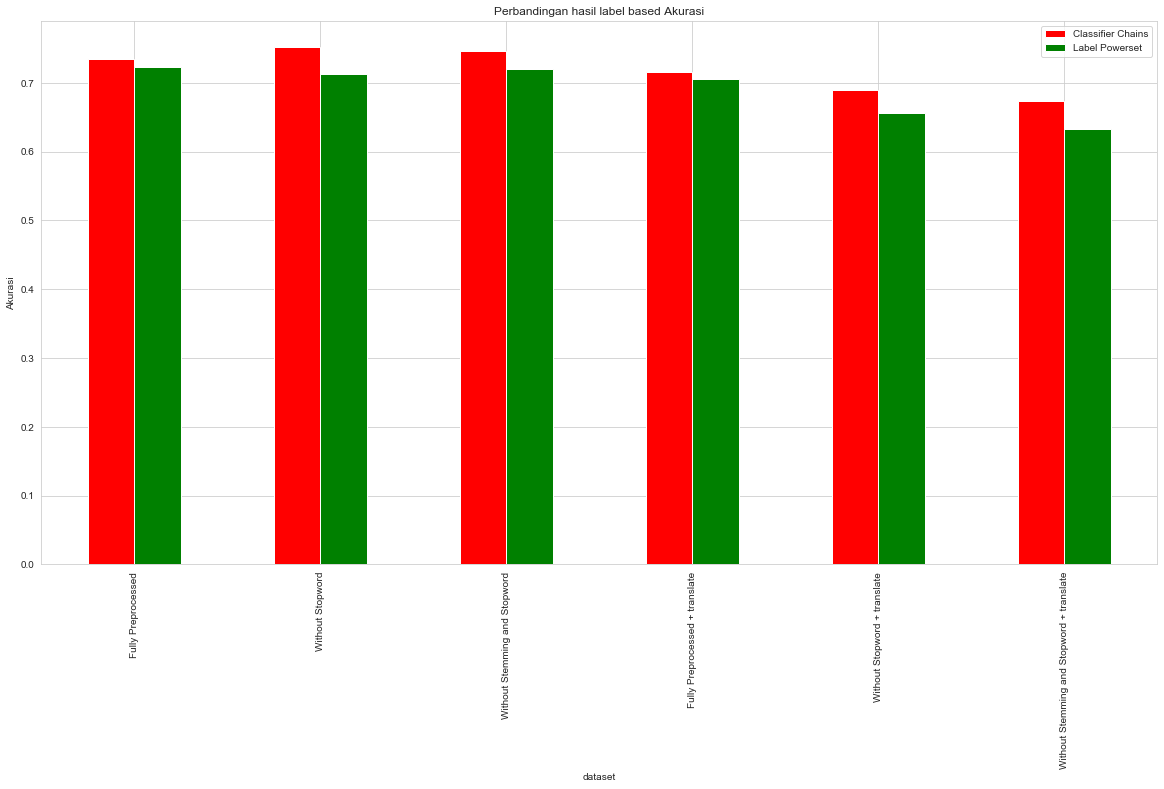

In [63]:
labelbased_result_acc_val = pd.DataFrame({
    "Dataset" : ["Fully Preprocessed","Without Stopword","Without Stemming and Stopword","Fully Preprocessed + translate","Without Stopword + translate","Without Stemming and Stopword + translate"],
    "Classifier Chains" : [labelSetAcc_CC_full_val,labelSetAcc_CC_nostopword_val,labelSetAcc_CC_nostemstop_val,labelSetAcc_CC_trans_full_val,labelSetAcc_CC_trans_nostopword_val,labelSetAcc_CC_trans_nostemstop_val],
    "Label Powerset" : [labelSetAcc_LP_full_val,labelSetAcc_LP_nostopword_val,labelSetAcc_LP_nostemstop_val,labelSetAcc_LP_trans_full_val,labelSetAcc_LP_trans_nostopword_val,labelSetAcc_LP_trans_nostemstop_val]
})

labelbased_result_acc_val = labelbased_result_acc_val.set_index("Dataset")
labelbased_result_acc_val.plot(kind='bar',color="rgb",figsize=(20,10))
plt.title("Perbandingan hasil label based Akurasi")
plt.xlabel('dataset')
plt.ylabel('Akurasi')
plt.show()

In [64]:
labelbased_result_acc_val

,Classifier Chains,Label Powerset
Dataset,,
Fully Preprocessed,0.734749,0.723298
Without Stopword,0.752413,0.712124
Without Stemming and Stopword,0.746693,0.719315
Fully Preprocessed + translate,0.715771,0.705939
Without Stopword + translate,0.688880,0.655838
Without Stemming and Stopword + translate,0.673595,0.632534


1. 2. Data Test

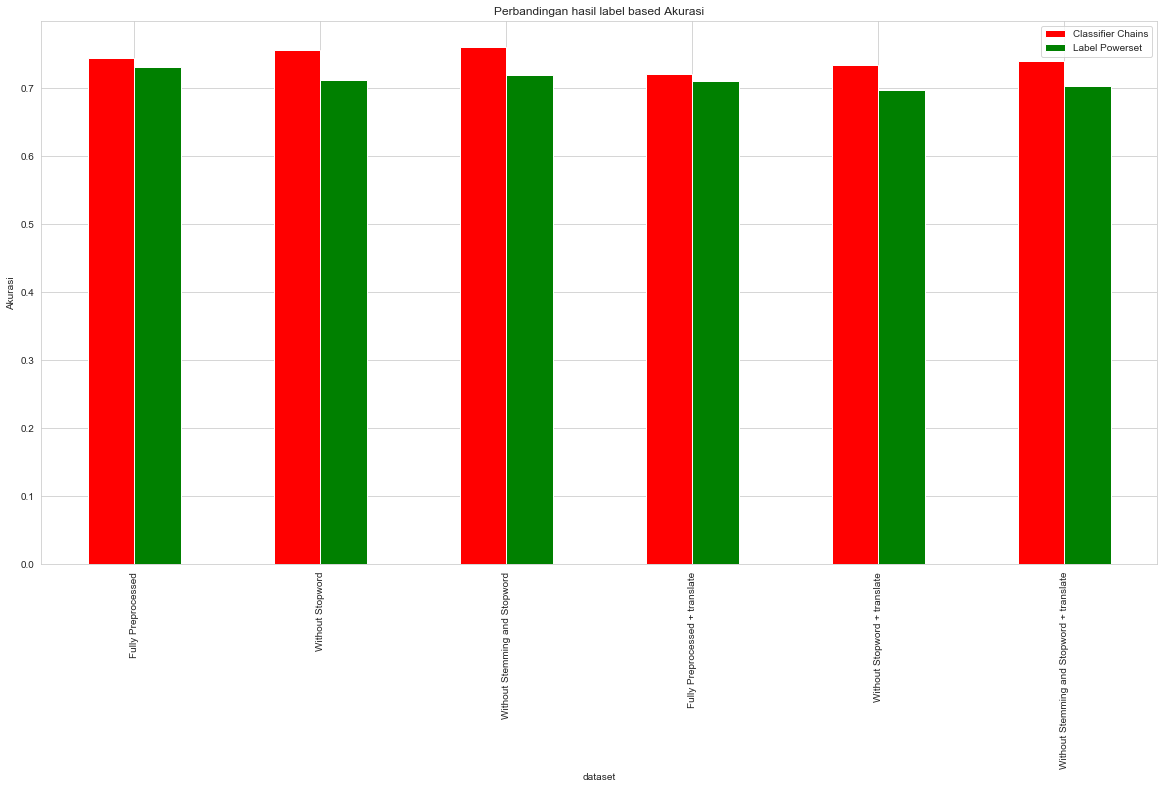

In [65]:
labelbased_result_acc = pd.DataFrame({
    "Dataset" : ["Fully Preprocessed","Without Stopword","Without Stemming and Stopword","Fully Preprocessed + translate","Without Stopword + translate","Without Stemming and Stopword + translate"],
    "Classifier Chains" : [labelSetAcc_CC_full,labelSetAcc_CC_nostopword,labelSetAcc_CC_nostemstop,labelSetAcc_CC_trans_full,labelSetAcc_CC_trans_nostopword,labelSetAcc_CC_trans_nostemstop],
    "Label Powerset" : [labelSetAcc_LP_full,labelSetAcc_LP_nostopword,labelSetAcc_LP_nostemstop,labelSetAcc_LP_trans_full,labelSetAcc_LP_trans_nostopword,labelSetAcc_LP_trans_nostemstop]
})

labelbased_result_acc = labelbased_result_acc.set_index("Dataset")
labelbased_result_acc.plot(kind='bar',color="rgb",figsize=(20,10))
plt.title("Perbandingan hasil label based Akurasi")
plt.xlabel('dataset')
plt.ylabel('Akurasi')
plt.show()

In [66]:
labelbased_result_acc

,Classifier Chains,Label Powerset
Dataset,,
Fully Preprocessed,0.745301,0.731288
Without Stopword,0.756508,0.711689
Without Stemming and Stopword,0.761190,0.719469
Fully Preprocessed + translate,0.720916,0.710409
Without Stopword + translate,0.733645,0.697752
Without Stemming and Stopword + translate,0.740812,0.702788


**2. Exact Match Accuracy**

2. 1. Data Validasi

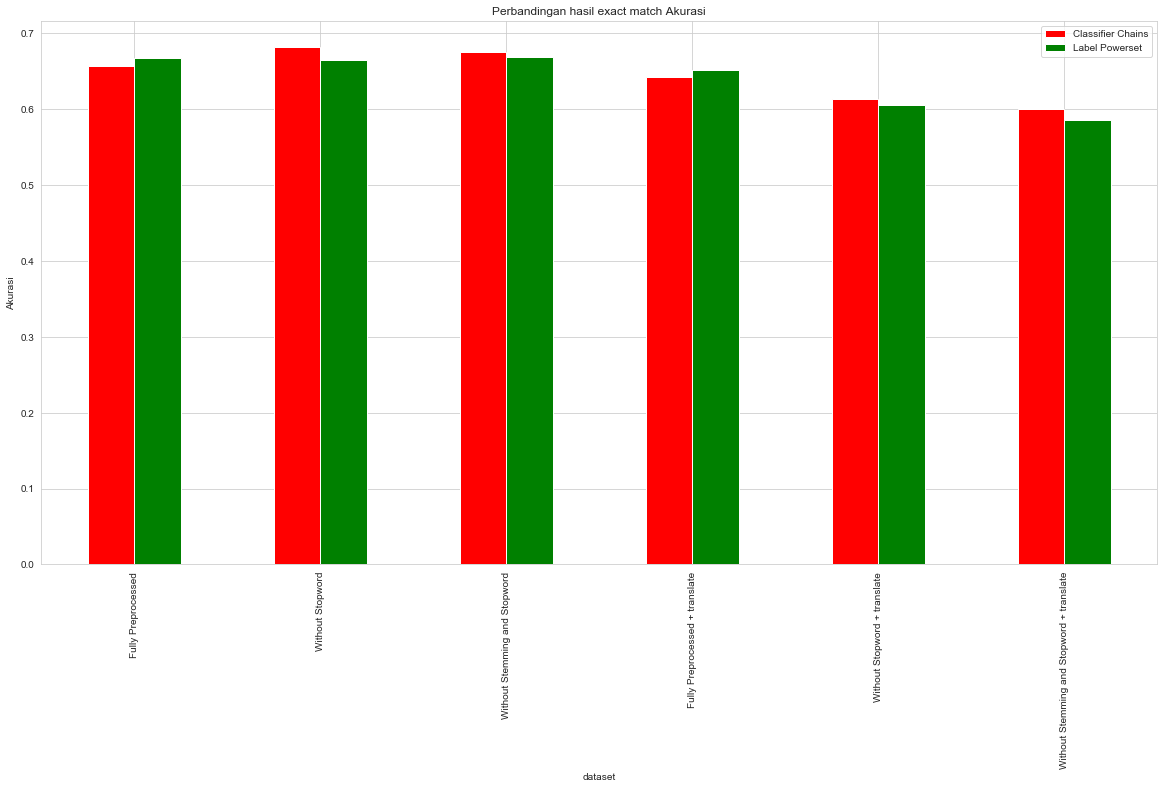

In [67]:
exactmatch_result_acc_val = pd.DataFrame({
    "Dataset" : ["Fully Preprocessed","Without Stopword","Without Stemming and Stopword","Fully Preprocessed + translate","Without Stopword + translate","Without Stemming and Stopword + translate"],
    "Classifier Chains" : [exactAcc_CC_full_val,exactAcc_CC_nostopword_val,exactAcc_CC_nostemstop_val,exactAcc_CC_trans_full_val,exactAcc_CC_trans_nostopword_val,exactAcc_CC_trans_nostemstop_val],
    "Label Powerset" : [exactAcc_LP_full_val,exactAcc_LP_nostopword_val,exactAcc_LP_nostemstop_val,exactAcc_LP_trans_full_val,exactAcc_LP_trans_nostopword_val,exactAcc_LP_trans_nostemstop_val]
})

exactmatch_result_acc_val = exactmatch_result_acc_val.set_index("Dataset")
exactmatch_result_acc_val.plot(kind='bar',color="rgb",figsize=(20,10))
plt.title("Perbandingan hasil exact match Akurasi")
plt.xlabel('dataset')
plt.ylabel('Akurasi')
plt.show()

In [68]:
exactmatch_result_acc_val

,Classifier Chains,Label Powerset
Dataset,,
Fully Preprocessed,0.656250,0.667120
Without Stopword,0.682065,0.665082
Without Stemming and Stopword,0.674592,0.669158
Fully Preprocessed + translate,0.641984,0.651495
Without Stopword + translate,0.613451,0.604620
Without Stemming and Stopword + translate,0.600543,0.585598


2. 2. *Data Test*

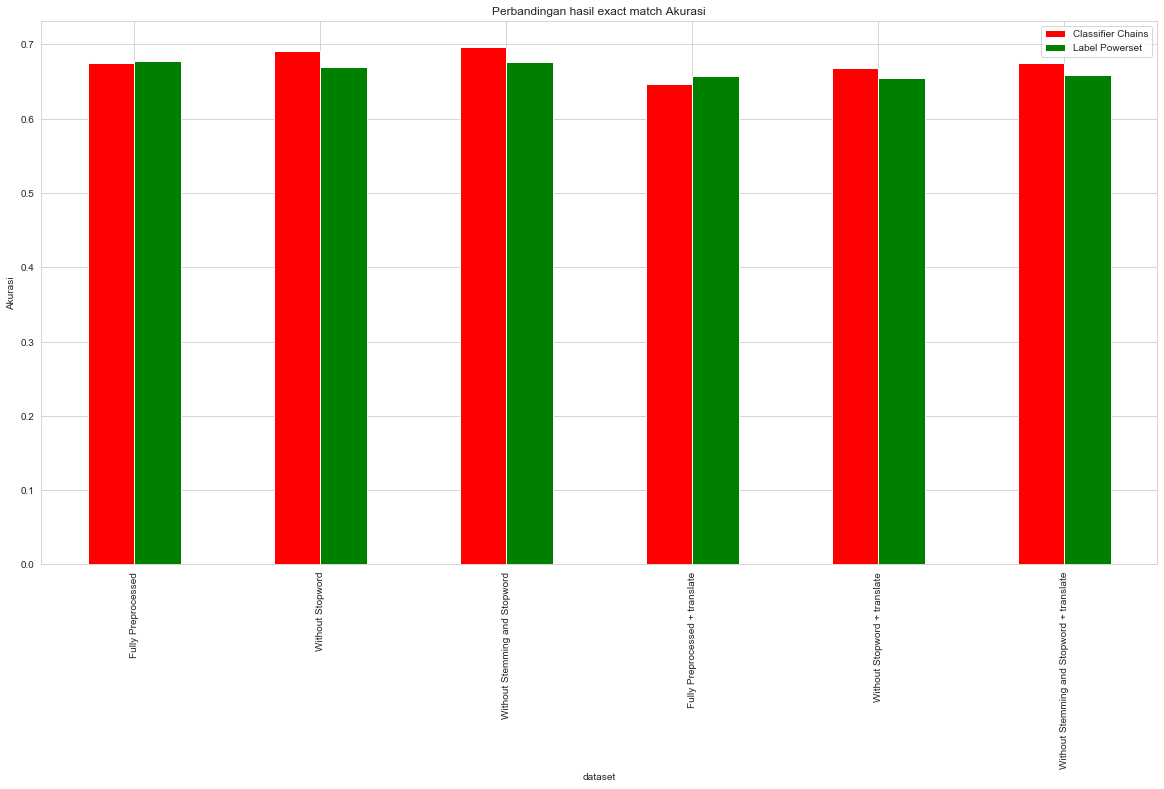

In [69]:
exactmatch_result_acc = pd.DataFrame({
    "Dataset" : ["Fully Preprocessed","Without Stopword","Without Stemming and Stopword","Fully Preprocessed + translate","Without Stopword + translate","Without Stemming and Stopword + translate"],
    "Classifier Chains" : [exactAcc_CC_full,exactAcc_CC_nostopword,exactAcc_CC_nostemstop,exactAcc_CC_trans_full,exactAcc_CC_trans_nostopword,exactAcc_CC_trans_nostemstop],
    "Label Powerset" : [exactAcc_LP_full,exactAcc_LP_nostopword,exactAcc_LP_nostemstop,exactAcc_LP_trans_full,exactAcc_LP_trans_nostopword,exactAcc_LP_trans_nostemstop]
})

exactmatch_result_acc = exactmatch_result_acc.set_index("Dataset")
exactmatch_result_acc.plot(kind='bar',color="rgb",figsize=(20,10))
plt.title("Perbandingan hasil exact match Akurasi")
plt.xlabel('dataset')
plt.ylabel('Akurasi')
plt.show()

In [70]:
exactmatch_result_acc

,Classifier Chains,Label Powerset
Dataset,,
Fully Preprocessed,0.675000,0.677989
Without Stopword,0.690761,0.669837
Without Stemming and Stopword,0.697011,0.675815
Fully Preprocessed + translate,0.647011,0.657065
Without Stopword + translate,0.667935,0.655435
Without Stemming and Stopword + translate,0.675272,0.659511


**3. Hamming Loss**

3. 1. Data Validasi

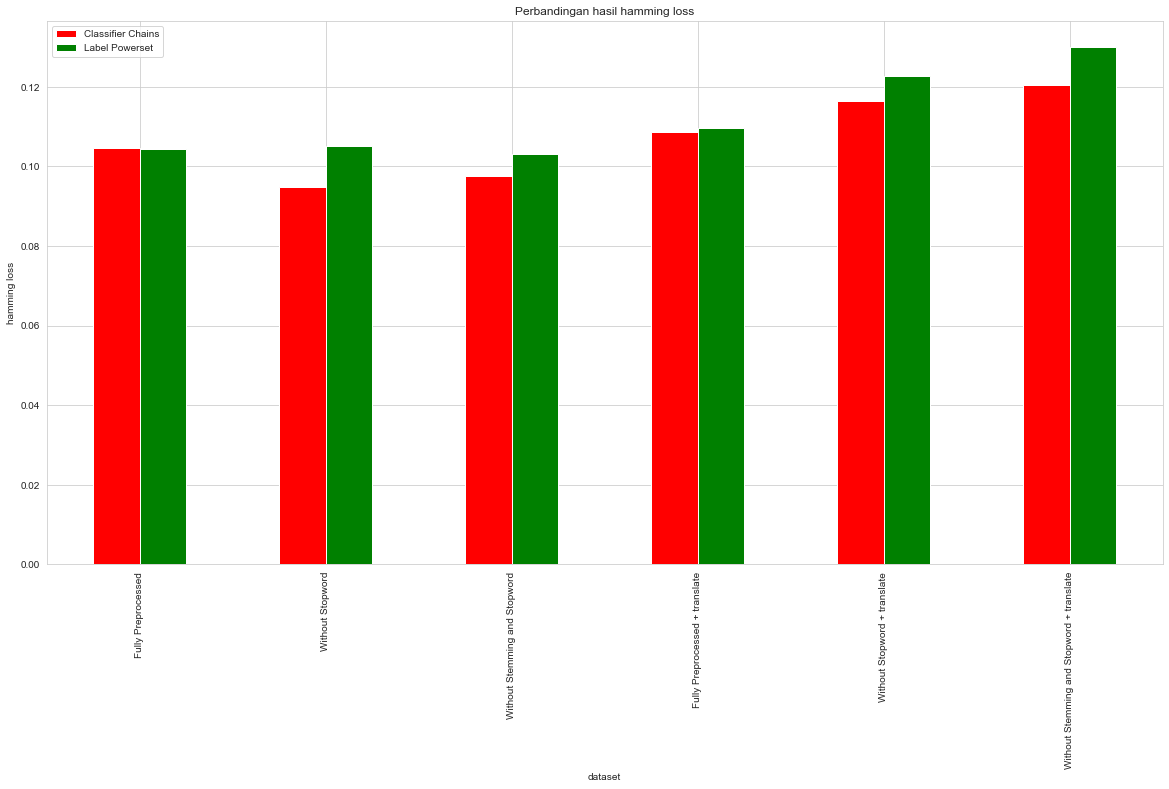

In [71]:
hammingloss_result_acc_val = pd.DataFrame({
    "Dataset" : ["Fully Preprocessed","Without Stopword","Without Stemming and Stopword","Fully Preprocessed + translate","Without Stopword + translate","Without Stemming and Stopword + translate"],
    "Classifier Chains" : [haml_CC_full_val,haml_CC_nostopword_val,haml_CC_nostemstop_val,haml_CC_trans_full_val,haml_CC_trans_nostopword_val,haml_CC_trans_nostemstop_val],
    "Label Powerset" : [haml_LP_full_val,haml_LP_nostopword_val,haml_LP_nostemstop_val,haml_LP_trans_full_val,haml_LP_trans_nostopword_val,haml_LP_trans_nostemstop_val]
})

hammingloss_result_acc_val = hammingloss_result_acc_val.set_index("Dataset")
hammingloss_result_acc_val.plot(kind='bar',color="rgb",figsize=(20,10))
plt.title("Perbandingan hasil hamming loss")
plt.xlabel('dataset')
plt.ylabel('hamming loss')
plt.show()

In [72]:
hammingloss_result_acc_val

,Classifier Chains,Label Powerset
Dataset,,
Fully Preprocessed,0.104563,0.104223
Without Stopword,0.094826,0.105186
Without Stemming and Stopword,0.097486,0.103091
Fully Preprocessed + translate,0.108582,0.109658
Without Stopword + translate,0.116508,0.122736
Without Stemming and Stopword + translate,0.120301,0.130038


3. 2. Data Test

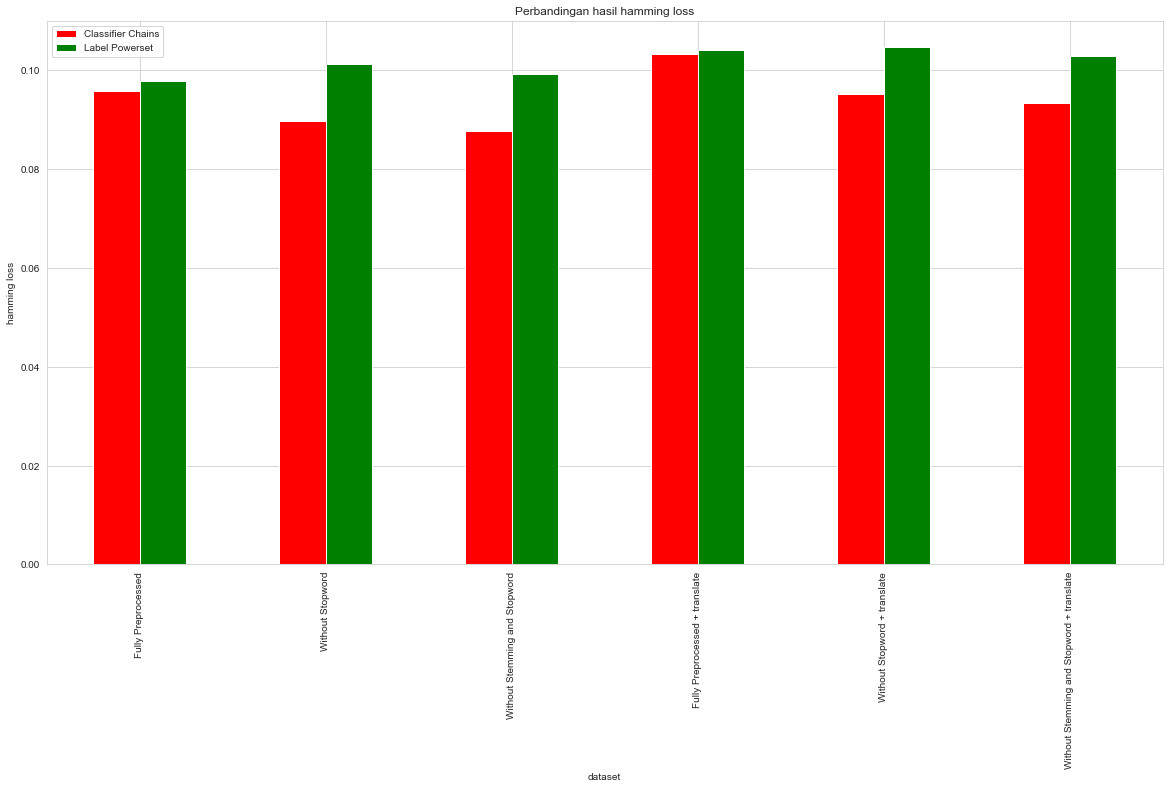

In [73]:
hammingloss_result_acc = pd.DataFrame({
    "Dataset" : ["Fully Preprocessed","Without Stopword","Without Stemming and Stopword","Fully Preprocessed + translate","Without Stopword + translate","Without Stemming and Stopword + translate"],
    "Classifier Chains" : [haml_CC_full,haml_CC_nostopword,haml_CC_nostemstop,haml_CC_trans_full,haml_CC_trans_nostopword,haml_CC_trans_nostemstop],
    "Label Powerset" : [haml_LP_full,haml_LP_nostopword,haml_LP_nostemstop,haml_LP_trans_full,haml_LP_trans_nostopword,haml_LP_trans_nostemstop]
})

hammingloss_result_acc = hammingloss_result_acc.set_index("Dataset")
hammingloss_result_acc.plot(kind='bar',color="rgb",figsize=(20,10))
plt.title("Perbandingan hasil hamming loss")
plt.xlabel('dataset')
plt.ylabel('hamming loss')
plt.show()

In [74]:
hammingloss_result_acc

,Classifier Chains,Label Powerset
Dataset,,
Fully Preprocessed,0.095901,0.097803
Without Stopword,0.089697,0.101336
Without Stemming and Stopword,0.087681,0.099230
Fully Preprocessed + translate,0.103397,0.104076
Without Stopword + translate,0.095267,0.104801
Without Stemming and Stopword + translate,0.093365,0.102853


## Result Analysis on Best and Worst Result

In [28]:
fitur_full = X_test_full.columns
fitur_nostopword = X_test_nostopword.columns
fitur_nostemstop = X_test_nostemstop.columns
fitur_trans_full = X_test_trans_full.columns
fitur_trans_nostopword = X_test_trans_nostopword.columns
fitur_trans_nostemstop = X_test_trans_nostemstop.columns
target = y_test_full.columns

In [43]:
data_test_full = pd.read_csv("../Data/data_test_full_preprocessed.csv",sep=";")
data_test_nostopword = pd.read_csv("../Data/data_test_nostopword_preprocessed.csv",sep=";")
data_test_nostemstop = pd.read_csv("../Data/data_test_nostemstop_preprocessed.csv",sep=";")

In [44]:
data_test_trans_full = pd.read_csv("../Data/data_test_trans_full_preprocessed.csv",sep=";")
data_test_trans_nostopword = pd.read_csv("../Data/data_test_trans_nostopword_preprocessed.csv",sep=";")
data_test_trans_nostemstop = pd.read_csv("../Data/data_test_trans_nostemstop_preprocessed.csv",sep=";")

In [31]:
def generate_ngrams(s):
    
    # Break sentence in the token, remove empty tokens
    tokens = [token for token in s.str.split(" ") if token != ""]
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = np.concatenate(tokens)
    return ngrams

def oov(fitur,token):
    outOfVocab = []
    for i in token:
        if i not in fitur:
            outOfVocab.append(i)
    return outOfVocab

def oov_count(oovList):
    oovCount = {}
    for i in oovList:
        if i in oovCount.keys():
            oovCount[i] = oovCount[i]+1
        else:
            oovCount[i] = 1
    return oovCount

### Without Translation

#### Without Stemming and Stopword Removal with Classifier Chains (Best)

In [162]:
data_test_nostemstop_predict = pd.DataFrame(data=data_test_nostemstop['Tweet'],columns=['Tweet']).reset_index(drop=True).join(pd.DataFrame(data=pred_CC_nostemstop.toarray(), columns=target)).join(pd.DataFrame(data=data_test_nostemstop['Tweet_Parsed'],columns=['Tweet_Parsed']).reset_index(drop=True))

- **Check Number of Labels on Predict Data**

In [163]:
label_size0_test = []
label_size1_test = []

for i in data_test_nostemstop.columns[2:-1]:
    label_size0_test.append(len(data_test_nostemstop[data_test_nostemstop[i]==0]))
    label_size1_test.append(len(data_test_nostemstop[data_test_nostemstop[i]==1]))

label_size0_test_predict = []
label_size1_test_predict = []

for i in data_test_nostemstop_predict.columns[1:-1]:
    label_size0_test_predict.append(len(data_test_nostemstop_predict[data_test_nostemstop_predict[i]==0]))
    label_size1_test_predict.append(len(data_test_nostemstop_predict[data_test_nostemstop_predict[i]==1]))

In [164]:
dat_anls_test = pd.DataFrame({
    'label' : data_test_nostemstop.columns[2:-1],
    'stats' : ["negative" for i in range(len(data_test_nostemstop.columns[2:-1]))],
    'jumlah' : label_size0_test
}).append(
    pd.DataFrame({
        'label' : data_test_nostemstop.columns[2:-1],
        'stats' : ["positive" for i in range(len(data_test_nostemstop.columns[2:-1]))],
        'jumlah' : label_size1_test
    })
)

# dat_anls_test = dat_anls_test.set_index(['label'], drop=True)

dat_anls_test_predict = pd.DataFrame({
    'label' : data_test_nostemstop_predict.columns[1:-1],
    'stats' : ["negative" for i in range(len(data_test_nostemstop_predict.columns[1:-1]))],
    'jumlah' : label_size0_test_predict
}).append(
    pd.DataFrame({
        'label' : data_test_nostemstop_predict.columns[1:-1],
        'stats' : ["positive" for i in range(len(data_test_nostemstop_predict.columns[1:-1]))],
        'jumlah' : label_size1_test_predict
    })
)

# dat_anls_test_predict = dat_anls_test_predict.set_index(['label'], drop=True)

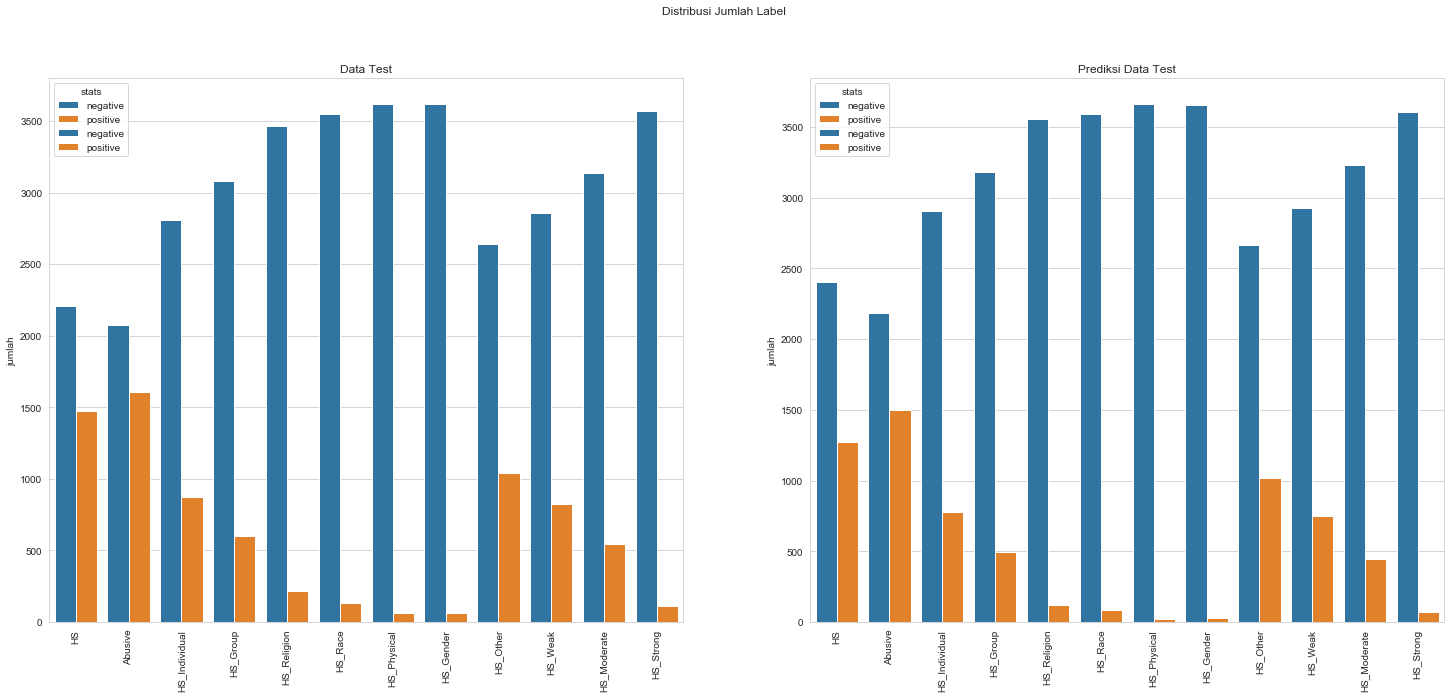

In [165]:
plt.figure(figsize=(25,10))
plt.suptitle('Distribusi Jumlah Label')

plt.subplot(1,2,1)
sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_test).set_xticklabels(sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_test).get_xticklabels(),rotation=90)
plt.title("Data Test")
plt.xlabel('')

plt.subplot(1,2,2)
sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_test_predict).set_xticklabels(sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_test_predict).get_xticklabels(),rotation=90)
plt.title("Prediksi Data Test")
plt.xlabel('')

plt.show()

In [166]:
pd.DataFrame({
    "label" : data_test_nostopword.columns[2:-1],
    "negative (true)" : dat_anls_test[dat_anls_test['stats'] == "negative"]["jumlah"].values,
    "positive (true)" : dat_anls_test[dat_anls_test['stats'] == "positive"]["jumlah"].values,
    "negative (predict)" : dat_anls_test_predict[dat_anls_test_predict['stats'] == "negative"]["jumlah"].values,
    "positive (predict)" : dat_anls_test_predict[dat_anls_test_predict['stats'] == "positive"]["jumlah"].values
})

,label,negative (true),positive (true),negative (predict),positive (predict)
0,HS,2204,1476,2406,1274
1,Abusive,2075,1605,2182,1498
2,HS_Individual,2806,874,2903,777
3,HS_Group,3078,602,3185,495
4,HS_Religion,3467,213,3559,121
5,HS_Race,3551,129,3594,86
6,HS_Physical,3617,63,3661,19
7,HS_Gender,3616,64,3654,26
8,HS_Other,2643,1037,2663,1017
9,HS_Weak,2854,826,2928,752


- **OOV Check**

In [167]:
join_data_test = data_test_nostemstop.join(data_test_nostemstop_predict.drop(['Tweet','Tweet_Parsed'],axis=1),rsuffix="_predict")

In [86]:
join_data_test.to_csv("../3 method best result/test_predict_RF_CC_nostemstop.csv",index=False,sep=";")

In [168]:
miss_exact_tweet_test = join_data_test[(join_data_test["HS"]!=join_data_test["HS_predict"]) | (join_data_test["Abusive"] != join_data_test["Abusive_predict"]) | (join_data_test["HS_Individual"] != join_data_test["HS_Individual_predict"]) | (join_data_test["HS_Group"] != join_data_test["HS_Group_predict"]) | (join_data_test["HS_Religion"] != join_data_test["HS_Religion_predict"]) | (join_data_test["HS_Race"] != join_data_test["HS_Race_predict"]) | (join_data_test["HS_Physical"] != join_data_test["HS_Physical_predict"]) | (join_data_test["HS_Gender"] != join_data_test["HS_Gender_predict"]) | (join_data_test["HS_Other"] != join_data_test["HS_Other_predict"]) | (join_data_test["HS_Weak"] != join_data_test["HS_Weak_predict"]) | (join_data_test["HS_Moderate"] != join_data_test["HS_Moderate_predict"]) | (join_data_test["HS_Strong"] != join_data_test["HS_Strong_predict"])]

In [169]:
oov_test = oov(fitur_nostemstop, generate_ngrams(miss_exact_tweet_test['Tweet_Parsed']))
oov_test_count = oov_count(oov_test)

In [170]:
sorted(oov_test_count.items(), reverse=True, key=lambda item: item[1])

[('', 1599),
 ('i', 139),
 ('a', 115),
 ('x', 11),
 ('o', 6),
 ('coward', 5),
 ('e', 5),
 ('v', 4),
 ('r', 4),
 ('alfian', 4),
 ('ributkan', 4),
 ('timor', 4),
 ('leste', 4),
 ('angkatan', 4),
 ('berjilid', 3),
 ('cingkrang', 3),
 ('dikriminalisasi', 3),
 ('radicalist', 3),
 ('berdebat', 3),
 ('biksu', 3),
 ('songong', 3),
 ('pemuja', 3),
 ('c', 3),
 ('k', 3),
 ('t', 3),
 ('became', 3),
 ('ours', 3),
 ('yours', 3),
 ('smile', 3),
 ('insane', 3),
 ('mengelola', 3),
 ('wibawa', 3),
 ('hadapi', 3),
 ('b', 3),
 ('penodaan', 3),
 ('syekh', 3),
 ('votes', 3),
 ('akrobat', 3),
 ('describe', 3),
 ('debate', 3),
 ('israeli', 3),
 ('jak', 3),
 ('mengaca', 3),
 ('pick', 3),
 ('whose', 3),
 ('exol', 3),
 ('mitos', 3),
 ('paria', 3),
 ('armys', 3),
 ('sehun', 3),
 ('pipi', 3),
 ('easter', 3),
 ('hamzah', 3),
 ('undur', 3),
 ('crime', 3),
 ('fucker', 3),
 ('upin', 2),
 ('ipin', 2),
 ('narrow', 2),
 ('kejar', 2),
 ('surprise', 2),
 ('acting', 2),
 ('education', 2),
 ('karbitan', 2),
 ('button', 2),
 

In [171]:
print("number of OOV words : ", len(oov_test))
print("number of unique OOV words : ", len(oov_test_count))

number of OOV words :  4458
number of unique OOV words :  2258


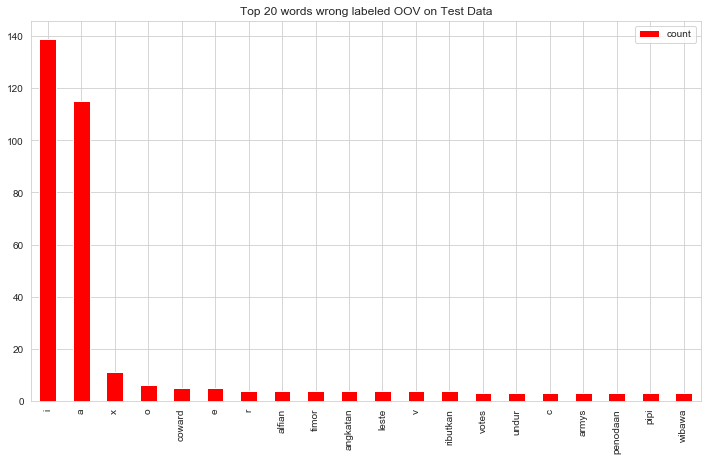

In [172]:
df_oov_test = pd.DataFrame(oov_test_count.items(),columns=["Tweet","count"])
df_oov_test.sort_values(['count'],ascending=False)[1:21].plot(
    kind='bar', y='count',x='Tweet', color='red', title='Top 20 words wrong labeled OOV on Test Data', figsize=(12,7))
plt.xlabel("")
plt.show()

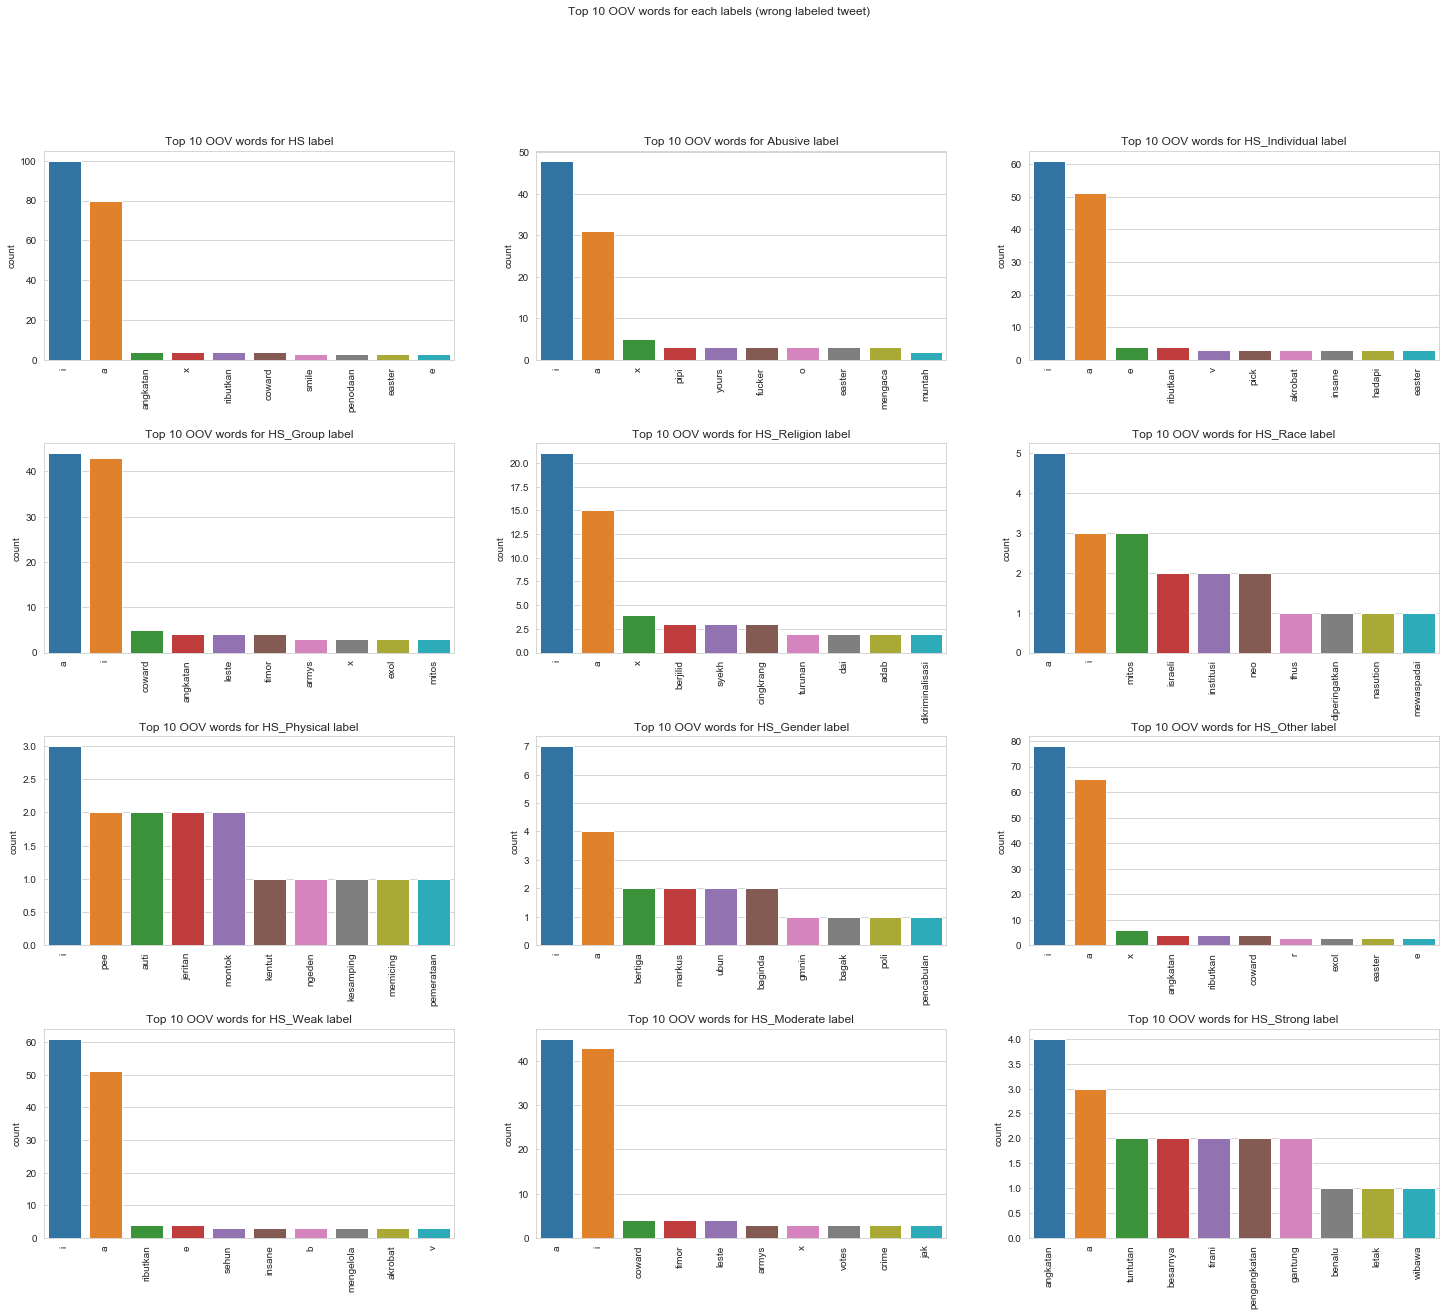

In [173]:
plt.figure(figsize=(25,20))
plt.suptitle('Top 10 OOV words for each labels (wrong labeled tweet)')
for i in range (len(target)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(hspace=0.4)
    wrongtweet = join_data_test[join_data_test[target[i]]!=join_data_test[target[i]+str("_predict")]]
    wrongtoken = generate_ngrams(wrongtweet['Tweet_Parsed']).tolist()
    wrong_oov = oov(fitur_nostemstop, wrongtoken)
    wrong_oov_count = oov_count(wrong_oov)
    frame = pd.DataFrame(wrong_oov_count.items(),columns=["Tweet","count"])
    frame = frame.sort_values(['count'],ascending=False)[1:11]
    sns.barplot(x="Tweet", y="count", data=frame).set_xticklabels(sns.barplot(x="Tweet", y="count", data=frame).get_xticklabels(),rotation=90)
    title='Top 10 OOV words for '+str(target[i])+" label"
    plt.title(title)
    plt.xlabel("")

- **Tweet Check**

In [174]:
len(miss_exact_tweet_test['Tweet'].values.tolist())

1115

In [175]:
miss_exact_tweet_test['Tweet'].values.tolist()

["GANTENG TAPI BERENGSEK!!! BUAT APA?!!\nWHO DO YOU THINK YOU ARE? YOU'RE NOTHING!! TO ME! << REMEMBER THIS!!",
 "USER Anak pecun... ga jauh2 dr hobi zina.. haha'",
 'USER Udah siap di demo berjilid2 sama bani cingkrang ? Malaysia memberlakukan syariat Islam, tapi melegalkan perjudian dengan berbagai syarat dan ketentuan yg "strict".\'',
 "Hamdalah. Kelar juga ini fitur keparat.'",
 "USER Jancuk! Pingin gue tabok itu anak'",
 "USER Kelemahan gerindra itu ada di orang ini,...Prabowo turun elektabilitasnya karena CONGOR fadlizon spt DURNO'",
 "RT USER: Ya, saya bajingan\\nTERIMA KASIH'",
 '#MataNajwaDebatJakarta lucu banget jawaban ahok.. gak nyambung. Ditanya apa di jawab apa. Kena skak mat d pertanyaan isu agama tdi. Dasar cina tolol hahaha',
 "USER Astagaaa.. Sewa pecun skalian ga pak?'",
 'Pantes idiot makananya upil URL',
 "educate your self a lil before saying things like this. Upin Ipin movie and Munafik doing so well here. It's 2020, narrow minded mind stay behind.",
 'Kok cuma c

In [176]:
miss_exact_tweet_test['Tweet_Parsed'].values.tolist()

['ganteng tapi berengsek buat apa who do you think you are you are nothing to me remember this ',
 'user anak pecun tidak jauh jauh dari hobi zina  ',
 'user sudah siap di demo berjilid jilid sama bani cingkrang malaysia memberlakukan syariat islam tapi melegalkan perjudian dengan berbagai syarat dan ketentuan  strict ',
 'hamdalah selesai juga ini fitur keparat ',
 'user jancuk ingin aku tabok itu anak ',
 'user kelemahan gerindra itu ada di orang ini prabowo turun elektabilitasnya karena congor fadli zon seperti durno ',
 'rt user  saya bajingan terima kasih ',
 ' mata najwa debat jakarta lucu banget jawaban ahok tidak menyambung ditanya apa di jawab apa kena sekak mat di pertanyaan isu agama tadi dasar cina tolol ',
 'user astaga sewa pecun sekalian tidak pak ',
 'pantas idiot makanannya upil url',
 'educate your self a little sebelum saying berpikir like this upin ipin film and munafik doing so well here it narrow minded mind stay behind ',
 ' hanya cina non muslim  dibantai itu  u

In [177]:
miss_exact_tweet_test.iloc[:,2:-13].columns

Index(['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race',
       'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate',
       'HS_Strong'],
      dtype='object')

In [178]:
# real label
miss_exact_tweet_test.iloc[:,2:-13].values.tolist()

[[1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1],
 [1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 [1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 1, 0, 1, 0, 0, 0,

In [179]:
miss_exact_tweet_test.iloc[:,-12:].values.tolist()

[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0

In [101]:
miss_exact_tweet_test.to_csv("../bestresult_RF_CC_nostemstop.csv",index=False,sep=";")

In [102]:
miss_exact_tweet_test

,Index,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,...,HS_Individual_predict,HS_Group_predict,HS_Religion_predict,HS_Race_predict,HS_Physical_predict,HS_Gender_predict,HS_Other_predict,HS_Weak_predict,HS_Moderate_predict,HS_Strong_predict
0,1,GANTENG TAPI BERENGSEK!!! BUAT APA?!!\nWHO DO ...,1,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,USER Anak pecun... ga jauh2 dr hobi zina.. haha',1,1,1,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,USER Udah siap di demo berjilid2 sama bani cin...,0,0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,10,Hamdalah. Kelar juga ini fitur keparat.',0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,12,USER Jancuk! Pingin gue tabok itu anak',1,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,20,"USER Kelemahan gerindra itu ada di orang ini,....",1,1,1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
21,22,"RT USER: Ya, saya bajingan\nTERIMA KASIH'",0,1,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
22,23,#MataNajwaDebatJakarta lucu banget jawaban aho...,1,1,1,0,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
24,25,USER Astagaaa.. Sewa pecun skalian ga pak?',0,1,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
30,31,Pantes idiot makananya upil URL,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- **BR Analysis (for best scenario only)**

In [46]:
data_test_nostemstop_predict = pd.DataFrame(data=data_test_nostemstop['Tweet'],columns=['Tweet']).reset_index(drop=True).join(pd.DataFrame(data=pred_BR_nostemstop.toarray(), columns=target)).join(pd.DataFrame(data=data_test_nostemstop['Tweet_Parsed'],columns=['Tweet_Parsed']).reset_index(drop=True))

In [47]:
join_data_test = data_test_nostemstop.join(data_test_nostemstop_predict.drop(['Tweet','Tweet_Parsed'],axis=1),rsuffix="_predict")

In [48]:
miss_exact_tweet_test = join_data_test[(join_data_test["HS"]!=join_data_test["HS_predict"]) | (join_data_test["Abusive"] != join_data_test["Abusive_predict"]) | (join_data_test["HS_Individual"] != join_data_test["HS_Individual_predict"]) | (join_data_test["HS_Group"] != join_data_test["HS_Group_predict"]) | (join_data_test["HS_Religion"] != join_data_test["HS_Religion_predict"]) | (join_data_test["HS_Race"] != join_data_test["HS_Race_predict"]) | (join_data_test["HS_Physical"] != join_data_test["HS_Physical_predict"]) | (join_data_test["HS_Gender"] != join_data_test["HS_Gender_predict"]) | (join_data_test["HS_Other"] != join_data_test["HS_Other_predict"]) | (join_data_test["HS_Weak"] != join_data_test["HS_Weak_predict"]) | (join_data_test["HS_Moderate"] != join_data_test["HS_Moderate_predict"]) | (join_data_test["HS_Strong"] != join_data_test["HS_Strong_predict"])]

In [49]:
miss_exact_tweet_test.to_csv("../3 method best result/bestresult_RF_BR_nostemstop.csv",index=False,sep=";")

#### Without Stopword Removal with Label Powerset (Worst)

In [103]:
data_test_nostopword_predict = pd.DataFrame(data=data_test_nostopword['Tweet'],columns=['Tweet']).reset_index(drop=True).join(pd.DataFrame(data=pred_LP_nostopword.toarray(), columns=target)).join(pd.DataFrame(data=data_test_nostopword['Tweet_Parsed'],columns=['Tweet_Parsed']).reset_index(drop=True))

- **Check Number of Labels on Predict Data**

In [104]:
label_size0_test = []
label_size1_test = []

for i in data_test_nostopword.columns[2:-1]:
    label_size0_test.append(len(data_test_nostopword[data_test_nostopword[i]==0]))
    label_size1_test.append(len(data_test_nostopword[data_test_nostopword[i]==1]))

label_size0_test_predict = []
label_size1_test_predict = []

for i in data_test_nostopword_predict.columns[1:-1]:
    label_size0_test_predict.append(len(data_test_nostopword_predict[data_test_nostopword_predict[i]==0]))
    label_size1_test_predict.append(len(data_test_nostopword_predict[data_test_nostopword_predict[i]==1]))

In [105]:
dat_anls_test = pd.DataFrame({
    'label' : data_test_nostopword.columns[2:-1],
    'stats' : ["negative" for i in range(len(data_test_nostopword.columns[2:-1]))],
    'jumlah' : label_size0_test
}).append(
    pd.DataFrame({
        'label' : data_test_nostopword.columns[2:-1],
        'stats' : ["positive" for i in range(len(data_test_nostopword.columns[2:-1]))],
        'jumlah' : label_size1_test
    })
)

# dat_anls_test = dat_anls_test.set_index(['label'], drop=True)

dat_anls_test_predict = pd.DataFrame({
    'label' : data_test_nostopword_predict.columns[1:-1],
    'stats' : ["negative" for i in range(len(data_test_nostopword_predict.columns[1:-1]))],
    'jumlah' : label_size0_test_predict
}).append(
    pd.DataFrame({
        'label' : data_test_nostopword_predict.columns[1:-1],
        'stats' : ["positive" for i in range(len(data_test_nostopword_predict.columns[1:-1]))],
        'jumlah' : label_size1_test_predict
    })
)

# dat_anls_test_predict = dat_anls_test_predict.set_index(['label'], drop=True)

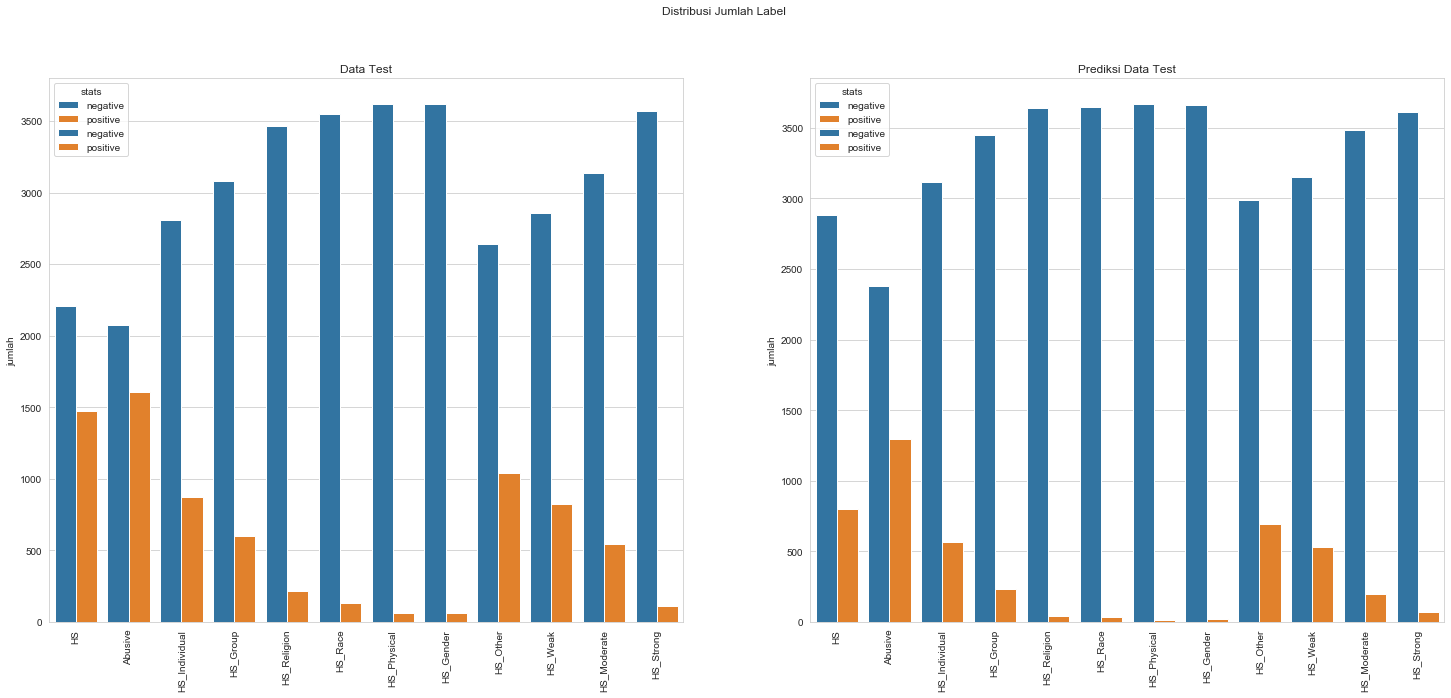

In [106]:
plt.figure(figsize=(25,10))
plt.suptitle('Distribusi Jumlah Label')

plt.subplot(1,2,1)
sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_test).set_xticklabels(sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_test).get_xticklabels(),rotation=90)
plt.title("Data Test")
plt.xlabel('')

plt.subplot(1,2,2)
sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_test_predict).set_xticklabels(sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_test_predict).get_xticklabels(),rotation=90)
plt.title("Prediksi Data Test")
plt.xlabel('')

plt.show()

In [107]:
pd.DataFrame({
    "label" : data_test_nostopword.columns[2:-1],
    "negative (true)" : dat_anls_test[dat_anls_test['stats'] == "negative"]["jumlah"].values,
    "positive (true)" : dat_anls_test[dat_anls_test['stats'] == "positive"]["jumlah"].values,
    "negative (predict)" : dat_anls_test_predict[dat_anls_test_predict['stats'] == "negative"]["jumlah"].values,
    "positive (predict)" : dat_anls_test_predict[dat_anls_test_predict['stats'] == "positive"]["jumlah"].values
})

,label,negative (true),positive (true),negative (predict),positive (predict)
0,HS,2204,1476,2883,797
1,Abusive,2075,1605,2382,1298
2,HS_Individual,2806,874,3117,563
3,HS_Group,3078,602,3446,234
4,HS_Religion,3467,213,3637,43
5,HS_Race,3551,129,3647,33
6,HS_Physical,3617,63,3667,13
7,HS_Gender,3616,64,3662,18
8,HS_Other,2643,1037,2988,692
9,HS_Weak,2854,826,3152,528


- **OOV Check**

In [45]:
join_data_test = data_test_nostopword.join(data_test_nostopword_predict.drop(['Tweet','Tweet_Parsed'],axis=1),rsuffix="_predict")

NameError: name 'data_test_nostopword_predict' is not defined

In [109]:
miss_exact_tweet_test = join_data_test[(join_data_test["HS"]!=join_data_test["HS_predict"]) | (join_data_test["Abusive"] != join_data_test["Abusive_predict"]) | (join_data_test["HS_Individual"] != join_data_test["HS_Individual_predict"]) | (join_data_test["HS_Group"] != join_data_test["HS_Group_predict"]) | (join_data_test["HS_Religion"] != join_data_test["HS_Religion_predict"]) | (join_data_test["HS_Race"] != join_data_test["HS_Race_predict"]) | (join_data_test["HS_Physical"] != join_data_test["HS_Physical_predict"]) | (join_data_test["HS_Gender"] != join_data_test["HS_Gender_predict"]) | (join_data_test["HS_Other"] != join_data_test["HS_Other_predict"]) | (join_data_test["HS_Weak"] != join_data_test["HS_Weak_predict"]) | (join_data_test["HS_Moderate"] != join_data_test["HS_Moderate_predict"]) | (join_data_test["HS_Strong"] != join_data_test["HS_Strong_predict"])]

In [110]:
oov_test = oov(fitur_nostopword, generate_ngrams(miss_exact_tweet_test['Tweet_Parsed']))
oov_test_count = oov_count(oov_test)

In [111]:
sorted(oov_test_count.items(), reverse=True, key=lambda item: item[1])

[('', 1770),
 ('a', 152),
 ('i', 138),
 ('x', 11),
 ('u', 11),
 ('e', 9),
 ('abal', 7),
 ('o', 5),
 ('c', 4),
 ('v', 4),
 ('b', 4),
 ('alfian', 4),
 ('aki', 4),
 ('green', 3),
 ('tea', 3),
 ('jokower', 3),
 ('radicalist', 3),
 ('biksu', 3),
 ('surup', 3),
 ('k', 3),
 ('r', 3),
 ('bah', 3),
 ('tenggorok', 3),
 ('embarrass', 3),
 ('ceplos', 3),
 ('akrobat', 3),
 ('bandit', 3),
 ('esa', 3),
 ('describe', 3),
 ('jak', 3),
 ('expose', 3),
 ('harm', 3),
 ('exol', 3),
 ('kik', 3),
 ('selingkuh', 3),
 ('cemburu', 3),
 ('mulyani', 3),
 ('rumpi', 3),
 ('easter', 3),
 ('timor', 3),
 ('leste', 3),
 ('plant', 3),
 ('hamzah', 3),
 ('undur', 3),
 ('ship', 3),
 ('fucker', 3),
 ('eta', 2),
 ('karbitan', 2),
 ('button', 2),
 ('celah', 2),
 ('curut', 2),
 ('familiar', 2),
 ('opposite', 2),
 ('citizen', 2),
 ('sogok', 2),
 ('tirani', 2),
 ('dai', 2),
 ('ours', 2),
 ('yours', 2),
 ('lick', 2),
 ('likuiditas', 2),
 ('tokek', 2),
 ('vicuw', 2),
 ('padah', 2),
 ('exam', 2),
 ('paloi', 2),
 ('becky', 2),
 ('ij

In [112]:
print("number of OOV words : ", len(oov_test))
print("number of unique OOV words : ", len(oov_test_count))

number of OOV words :  3674
number of unique OOV words :  1365


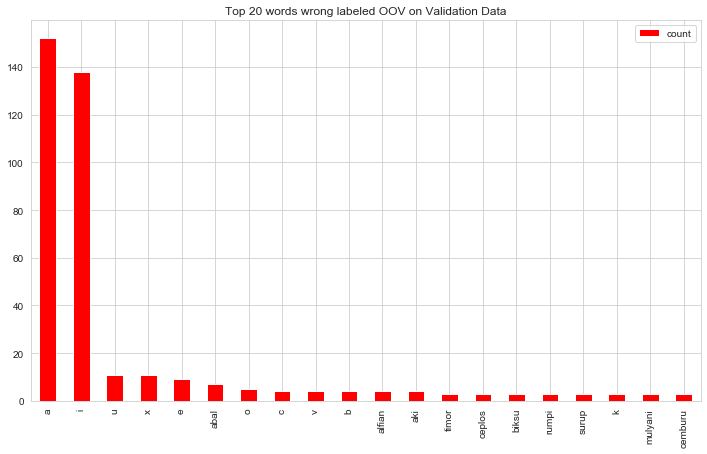

In [113]:
df_oov_test = pd.DataFrame(oov_test_count.items(),columns=["Tweet","count"])
df_oov_test.sort_values(['count'],ascending=False)[1:21].plot(
    kind='bar', y='count',x='Tweet', color='red', title='Top 20 words wrong labeled OOV on Validation Data', figsize=(12,7))
plt.xlabel("")
plt.show()

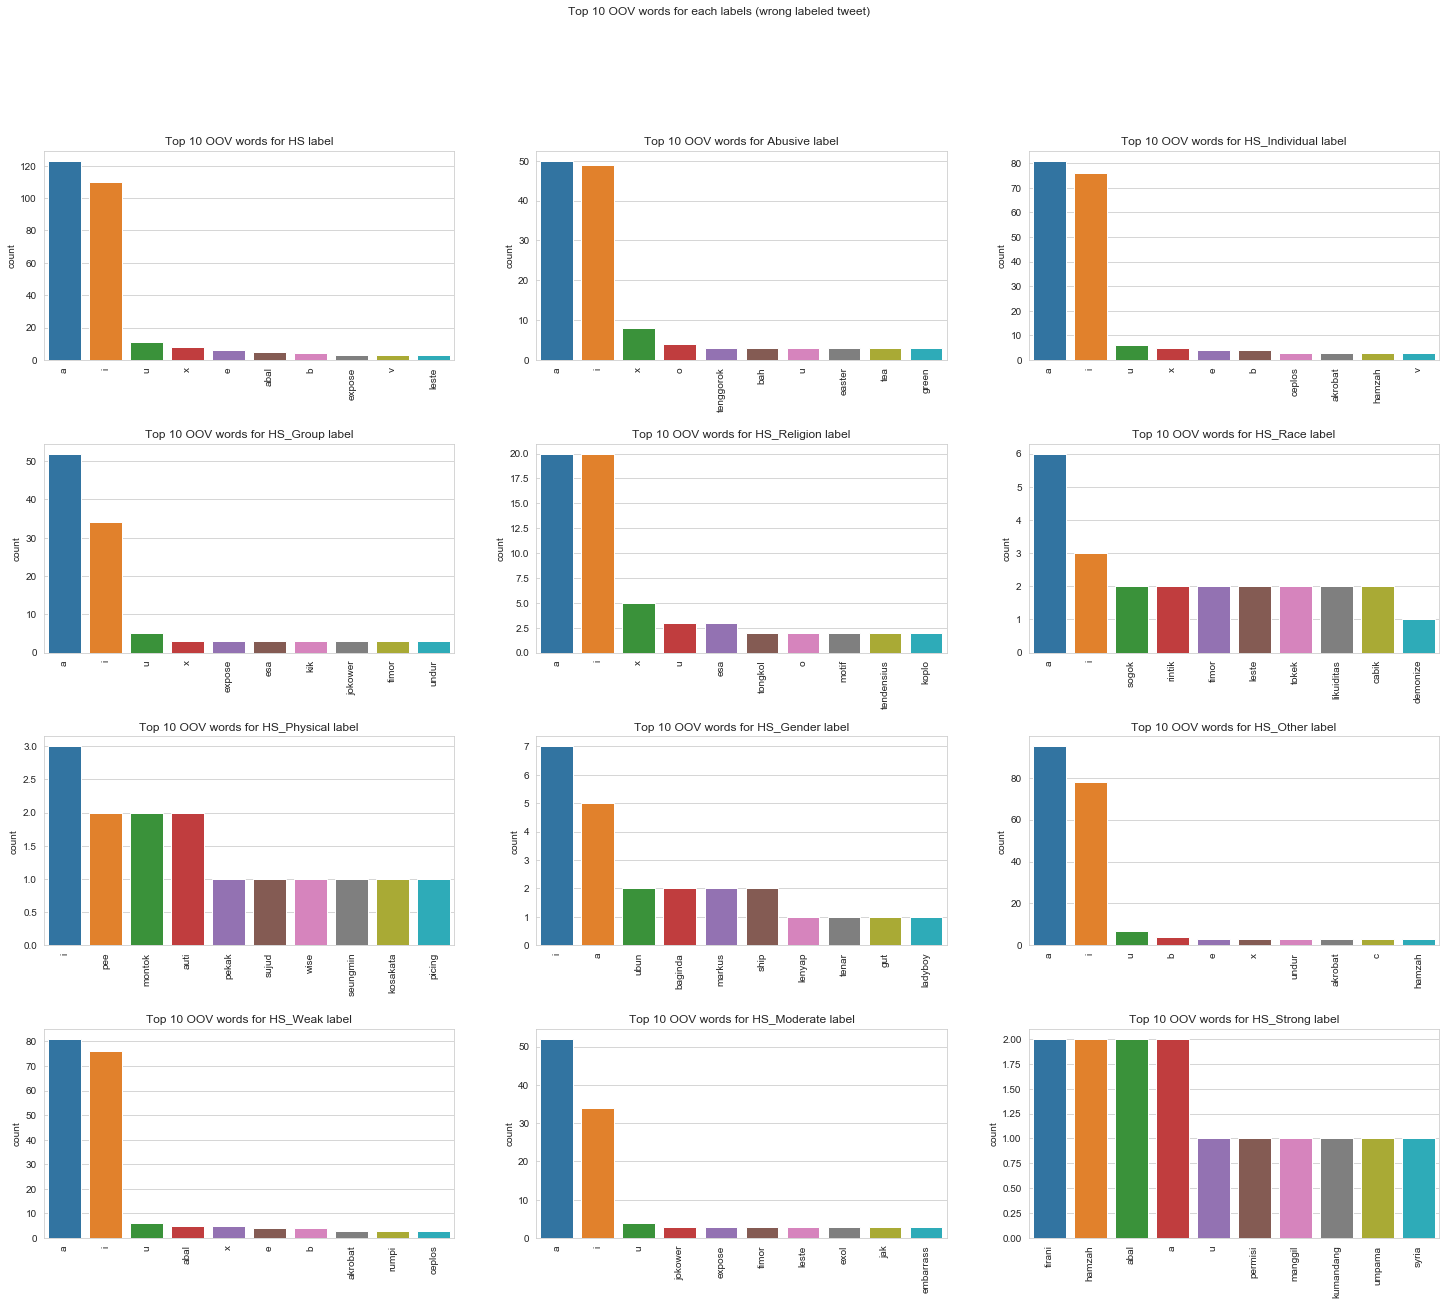

In [114]:
plt.figure(figsize=(25,20))
plt.suptitle('Top 10 OOV words for each labels (wrong labeled tweet)')
for i in range (len(target)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(hspace=0.4)
    wrongtweet = join_data_test[join_data_test[target[i]]!=join_data_test[target[i]+str("_predict")]]
    wrongtoken = generate_ngrams(wrongtweet['Tweet_Parsed']).tolist()
    wrong_oov = oov(fitur_nostopword, wrongtoken)
    wrong_oov_count = oov_count(wrong_oov)
    frame = pd.DataFrame(wrong_oov_count.items(),columns=["Tweet","count"])
    frame = frame.sort_values(['count'],ascending=False)[1:11]
    sns.barplot(x="Tweet", y="count", data=frame).set_xticklabels(sns.barplot(x="Tweet", y="count", data=frame).get_xticklabels(),rotation=90)
    title='Top 10 OOV words for '+str(target[i])+" label"
    plt.title(title)
    plt.xlabel("")

- **Tweet Check**

In [115]:
len(miss_exact_tweet_test['Tweet'].values.tolist())

1215

In [116]:
miss_exact_tweet_test['Tweet'].values.tolist()

["GANTENG TAPI BERENGSEK!!! BUAT APA?!!\nWHO DO YOU THINK YOU ARE? YOU'RE NOTHING!! TO ME! << REMEMBER THIS!!",
 "USER USER Karena partaimu pdip itu bajingan'",
 "USER Khan yg ngajarin si garong kafir'",
 "USER Anak pecun... ga jauh2 dr hobi zina.. haha'",
 "Hamdalah. Kelar juga ini fitur keparat.'",
 "USER Jancuk! Pingin gue tabok itu anak'",
 "USER Kelemahan gerindra itu ada di orang ini,...Prabowo turun elektabilitasnya karena CONGOR fadlizon spt DURNO'",
 '#MataNajwaDebatJakarta lucu banget jawaban ahok.. gak nyambung. Ditanya apa di jawab apa. Kena skak mat d pertanyaan isu agama tdi. Dasar cina tolol hahaha',
 "USER Astagaaa.. Sewa pecun skalian ga pak?'",
 'Pantes idiot makananya upil URL',
 'Why doe your bio. Look so fake? Are you a liar? Why are you such a liar? Nobody likes a liar. You should be proud of who you are. Stop lying',
 "educate your self a lil before saying things like this. Upin Ipin movie and Munafik doing so well here. It's 2020, narrow minded mind stay behind.

In [117]:
miss_exact_tweet_test['Tweet_Parsed'].values.tolist()

['ganteng tapi berengsek buat apa who do you think you be you be nothing to me remember this ',
 'user user karena partai partai demokrasi indonesia juang itu bajing ',
 'user   ajar  garong kafir ',
 'user anak pecun tidak jauh jauh dari hobi zina  ',
 'hamdalah selesai juga ini fitur keparat ',
 'user jancuk ingin aku tabok itu anak ',
 'user lemah gerindra itu ada di orang ini prabowo turun elektabilitasnya karena congor fadli zon seperti durno ',
 ' mata najwa debat jakarta lucu banget jawab ahok tidak sambung tanya apa di jawab apa kena sekak mat di tanya isu agama tadi dasar cina tolol ',
 'user astaga sewa pecun sekali tidak pak ',
 'pantas idiot makan upil url',
 'kenapa doe your bio look so fake be you a liar kenapa be you such a liar nobody like a liar you should be proud of who you be stop lie',
 'educate your self a little belum say pikir like this upin ipin film and munafik do so well here it narrow mind mind stay behind ',
 'anyway what can kamu do if i tell you about all

In [119]:
miss_exact_tweet_test.iloc[:,2:-13].columns

Index(['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race',
       'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate',
       'HS_Strong'],
      dtype='object')

In [121]:
# real label
miss_exact_tweet_test.iloc[:,2:-13].values.tolist()

[[1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0,

In [122]:
miss_exact_tweet_test.iloc[:,-12:].values.tolist()

[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0,

### With Translation

#### Without Stemming and Stopword Using Classifier Chains (Best)

In [123]:
data_test_predict = pd.DataFrame(data=data_test_trans_nostemstop['Tweet'],columns=['Tweet']).reset_index(drop=True).join(pd.DataFrame(data=pred_CC_trans_nostemstop.toarray(), columns=target)).join(pd.DataFrame(data=data_test_trans_nostemstop['Tweet_Parsed'],columns=['Tweet_Parsed']).reset_index(drop=True))

- **Check Number of Labels on Predict Data**

In [124]:
label_size0_test = []
label_size1_test = []

for i in data_test_trans_nostemstop.columns[2:-1]:
    label_size0_test.append(len(data_test_trans_nostemstop[data_test_trans_nostemstop[i]==0]))
    label_size1_test.append(len(data_test_trans_nostemstop[data_test_trans_nostemstop[i]==1]))

label_size0_test_predict = []
label_size1_test_predict = []

for i in data_test_predict.columns[1:-1]:
    label_size0_test_predict.append(len(data_test_predict[data_test_predict[i]==0]))
    label_size1_test_predict.append(len(data_test_predict[data_test_predict[i]==1]))

In [125]:
dat_anls_test = pd.DataFrame({
    'label' : data_test_trans_nostemstop.columns[2:-1],
    'stats' : ["negative" for i in range(len(data_test_trans_nostemstop.columns[2:-1]))],
    'jumlah' : label_size0_test
}).append(
    pd.DataFrame({
        'label' : data_test_trans_nostemstop.columns[2:-1],
        'stats' : ["positive" for i in range(len(data_test_trans_nostemstop.columns[2:-1]))],
        'jumlah' : label_size1_test
    })
)

# dat_anls_test = dat_anls_test.set_index(['label'], drop=True)

dat_anls_test_predict = pd.DataFrame({
    'label' : data_test_predict.columns[1:-1],
    'stats' : ["negative" for i in range(len(data_test_predict.columns[1:-1]))],
    'jumlah' : label_size0_test_predict
}).append(
    pd.DataFrame({
        'label' : data_test_predict.columns[1:-1],
        'stats' : ["positive" for i in range(len(data_test_predict.columns[1:-1]))],
        'jumlah' : label_size1_test_predict
    })
)

# dat_anls_test_predict = dat_anls_test_predict.set_index(['label'], drop=True)

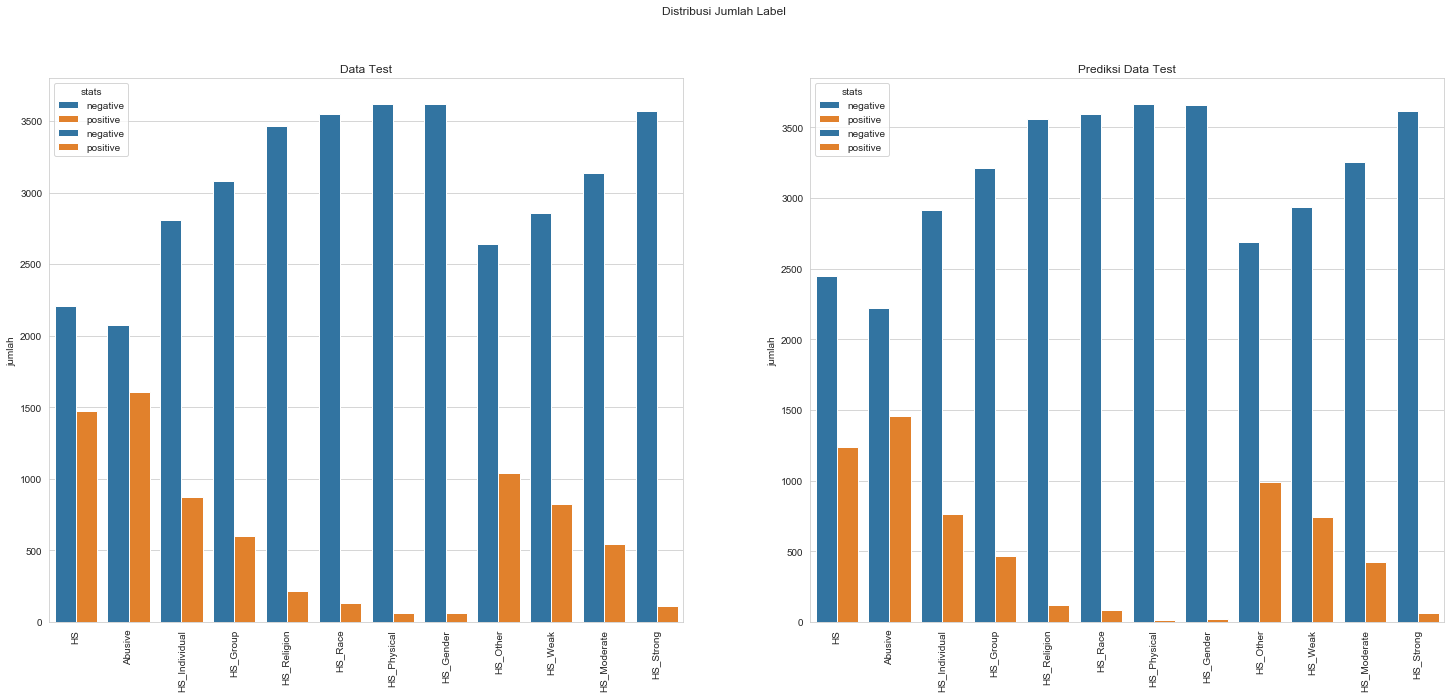

In [126]:
plt.figure(figsize=(25,10))
plt.suptitle('Distribusi Jumlah Label')

plt.subplot(1,2,1)
sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_test).set_xticklabels(sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_test).get_xticklabels(),rotation=90)
plt.title("Data Test")
plt.xlabel('')

plt.subplot(1,2,2)
sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_test_predict).set_xticklabels(sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_test_predict).get_xticklabels(),rotation=90)
plt.title("Prediksi Data Test")
plt.xlabel('')

plt.show()

In [127]:
pd.DataFrame({
    "label" : data_test_trans_nostemstop.columns[2:-1],
    "negative (true)" : dat_anls_test[dat_anls_test['stats'] == "negative"]["jumlah"].values,
    "positive (true)" : dat_anls_test[dat_anls_test['stats'] == "positive"]["jumlah"].values,
    "negative (predict)" : dat_anls_test_predict[dat_anls_test_predict['stats'] == "negative"]["jumlah"].values,
    "positive (predict)" : dat_anls_test_predict[dat_anls_test_predict['stats'] == "positive"]["jumlah"].values
})

,label,negative (true),positive (true),negative (predict),positive (predict)
0,HS,2204,1476,2445,1235
1,Abusive,2075,1605,2223,1457
2,HS_Individual,2806,874,2915,765
3,HS_Group,3078,602,3210,470
4,HS_Religion,3467,213,3558,122
5,HS_Race,3551,129,3594,86
6,HS_Physical,3617,63,3664,16
7,HS_Gender,3616,64,3661,19
8,HS_Other,2643,1037,2689,991
9,HS_Weak,2854,826,2936,744


- **OOV Check**

In [128]:
join_data_test = data_test_trans_nostemstop.join(data_test_predict.drop(['Tweet','Tweet_Parsed'],axis=1),rsuffix="_predict")

In [129]:
join_data_test.to_csv("../3 method best result/test_predict_RF_CC_trans_nostemstop.csv",index=False,sep=";")

In [130]:
miss_exact_tweet_test = join_data_test[(join_data_test["HS"]!=join_data_test["HS_predict"]) | (join_data_test["Abusive"] != join_data_test["Abusive_predict"]) | (join_data_test["HS_Individual"] != join_data_test["HS_Individual_predict"]) | (join_data_test["HS_Group"] != join_data_test["HS_Group_predict"]) | (join_data_test["HS_Religion"] != join_data_test["HS_Religion_predict"]) | (join_data_test["HS_Race"] != join_data_test["HS_Race_predict"]) | (join_data_test["HS_Physical"] != join_data_test["HS_Physical_predict"]) | (join_data_test["HS_Gender"] != join_data_test["HS_Gender_predict"]) | (join_data_test["HS_Other"] != join_data_test["HS_Other_predict"]) | (join_data_test["HS_Weak"] != join_data_test["HS_Weak_predict"]) | (join_data_test["HS_Moderate"] != join_data_test["HS_Moderate_predict"]) | (join_data_test["HS_Strong"] != join_data_test["HS_Strong_predict"])]

In [131]:
oov_test = oov(fitur_trans_nostemstop, generate_ngrams(miss_exact_tweet_test['Tweet_Parsed']))
oov_test_count = oov_count(oov_test)

In [132]:
sorted(oov_test_count.items(), reverse=True, key=lambda item: item[1])

[('', 1089),
 ('vibe', 11),
 ('x', 10),
 ('o', 6),
 ('i', 5),
 ('b', 5),
 ('songong', 4),
 ('c', 4),
 ('menjilat', 4),
 ('v', 4),
 ('r', 4),
 ('a', 4),
 ('ributkan', 4),
 ('kaligrafi', 4),
 ('menanam', 4),
 ('angkatan', 4),
 ('cingkrang', 3),
 ('memberlakukan', 3),
 ('dibantai', 3),
 ('travel', 3),
 ('bersin', 3),
 ('biksu', 3),
 ('alfian', 3),
 ('k', 3),
 ('butuhkan', 3),
 ('akrobat', 3),
 ('israeli', 3),
 ('jak', 3),
 ('gaji', 3),
 ('pendusta', 3),
 ('memesan', 3),
 ('mengekspos', 3),
 ('exol', 3),
 ('mitos', 3),
 ('dagang', 3),
 ('paria', 3),
 ('minangkabau', 3),
 ('sehun', 3),
 ('pipi', 3),
 ('paskah', 3),
 ('timor', 3),
 ('leste', 3),
 ('dongpyo', 3),
 ('undur', 3),
 ('tercekik', 2),
 ('ipin', 2),
 ('membencinya', 2),
 ('kejar', 2),
 ('green', 2),
 ('tea', 2),
 ('karbitan', 2),
 ('tombol', 2),
 ('dikriminalisasi', 2),
 ('spanduk', 2),
 ('dimiskinkan', 2),
 ('praktis', 2),
 ('pemuja', 2),
 ('mengabaikan', 2),
 ('tangisan', 2),
 ('t', 2),
 ('tirani', 2),
 ('dai', 2),
 ('pus', 2),
 (

In [133]:
print("number of OOV words : ", len(oov_test))
print("number of unique OOV words : ", len(oov_test_count))

number of OOV words :  3138
number of unique OOV words :  1767


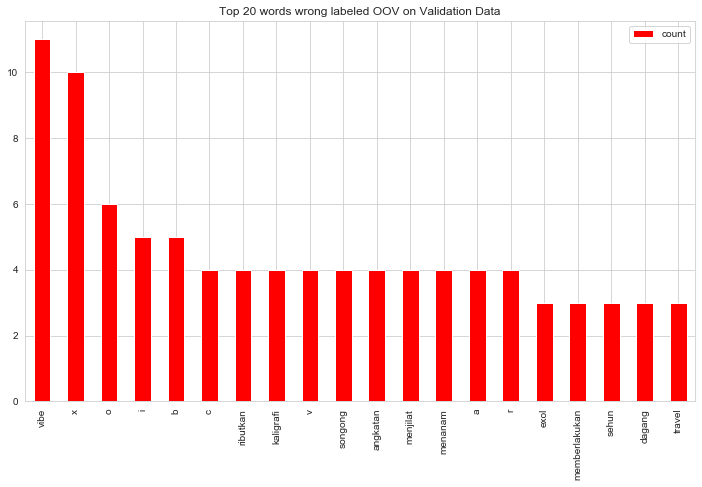

In [134]:
df_oov_test = pd.DataFrame(oov_test_count.items(),columns=["Tweet","count"])
df_oov_test.sort_values(['count'],ascending=False)[1:21].plot(
    kind='bar', y='count',x='Tweet', color='red', title='Top 20 words wrong labeled OOV on Validation Data', figsize=(12,7))
plt.xlabel("")
plt.show()

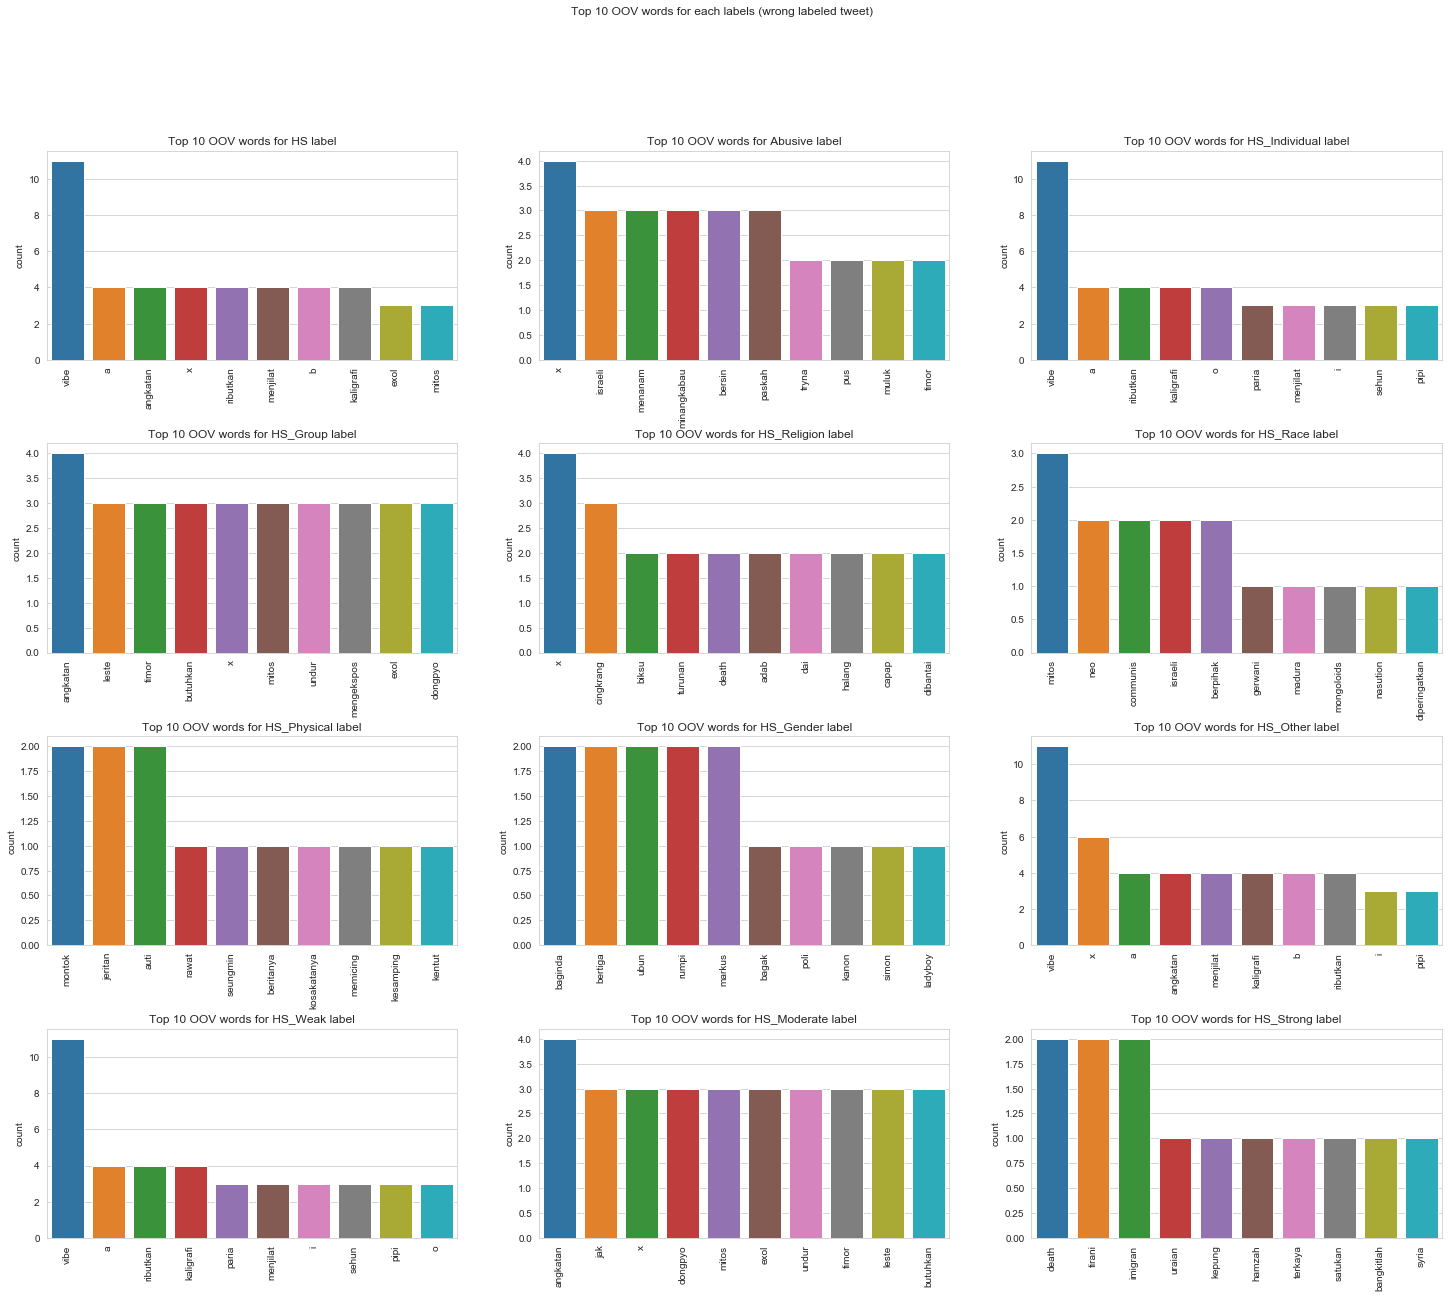

In [135]:
plt.figure(figsize=(25,20))
plt.suptitle('Top 10 OOV words for each labels (wrong labeled tweet)')
for i in range (len(target)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(hspace=0.4)
    wrongtweet = join_data_test[join_data_test[target[i]]!=join_data_test[target[i]+str("_predict")]]
    wrongtoken = generate_ngrams(wrongtweet['Tweet_Parsed']).tolist()
    wrong_oov = oov(fitur_trans_nostemstop, wrongtoken)
    wrong_oov_count = oov_count(wrong_oov)
    frame = pd.DataFrame(wrong_oov_count.items(),columns=["Tweet","count"])
    frame = frame.sort_values(['count'],ascending=False)[1:11]
    sns.barplot(x="Tweet", y="count", data=frame).set_xticklabels(sns.barplot(x="Tweet", y="count", data=frame).get_xticklabels(),rotation=90)
    title='Top 10 OOV words for '+str(target[i])+" label"
    plt.title(title)
    plt.xlabel("")

- **Tweet Check**

In [136]:
len(miss_exact_tweet_test['Tweet'].values.tolist())

1195

In [137]:
miss_exact_tweet_test['Tweet_Parsed'].values.tolist()

['ganteng tapi berengsek buat apa  kamu pikir kamu adalah kamu tidak ada  kuingat ini',
 'pengguna anak pecun tidak jauh dari hobi zina ',
 'pengguna sudah siap di demo berjilid jilid sama bani cingkrang malaysia memberlakukan syariat islam tapi melegalkan perjudian dengan berbagai persyaratan dan ketentuan  ketat',
 'hamdalah selesai juga ini fitur keparat',
 'pengguna jancuk ingin aku tabok itu anak',
 'pengguna kelemahan gerindra itu ada di orang ini prabowo turun elektabilitasnya karena congor fadli zon seperti durno',
 'indonesia benar benar tercekik oleh polusi udara  dilihat orang orang kampung atas pembakaran sampah mereka',
 'mata najwa debat jakarta lucu banget jawaban ahok tidak menyambung tanya apa  ada jawab apa kena sekak mat di pertanyaan masalah agama dasar cina tolol ',
 'pengguna astaga sewa pecun sekalian tidak pak',
 'saat kamu menipu dan menang kamu telah membedakan dirimu sebagai seorang pecundang dalam game laut malaysia ',
 'mengapa anda melakukan bio terlihat s

In [138]:
miss_exact_tweet_test.iloc[:,2:-13].columns

Index(['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race',
       'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate',
       'HS_Strong'],
      dtype='object')

In [139]:
# real label
miss_exact_tweet_test.iloc[:,2:-13].values.tolist()

[[1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1],
 [1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 [1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0,

In [140]:
miss_exact_tweet_test.iloc[:,-12:].values.tolist()

[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0

In [141]:
miss_exact_tweet_test.to_csv("../bestresult_RF_CC_trans_nostemstop.csv",index=False,sep=";")

#### Without Stopword Using Label Powerset (Worst)

In [142]:
data_test_predict = pd.DataFrame(data=data_test_trans_nostopword['Tweet'],columns=['Tweet']).reset_index(drop=True).join(pd.DataFrame(data=pred_LP_trans_nostopword.toarray(), columns=target)).join(pd.DataFrame(data=data_test_trans_nostopword['Tweet_Parsed'],columns=['Tweet_Parsed']).reset_index(drop=True))

- **Check Number of Labels on Predict Data**

In [143]:
label_size0_test = []
label_size1_test = []

for i in data_test_trans_nostopword.columns[2:-1]:
    label_size0_test.append(len(data_test_trans_nostopword[data_test_trans_nostopword[i]==0]))
    label_size1_test.append(len(data_test_trans_nostopword[data_test_trans_nostopword[i]==1]))

label_size0_test_predict = []
label_size1_test_predict = []

for i in data_test_predict.columns[1:-1]:
    label_size0_test_predict.append(len(data_test_predict[data_test_predict[i]==0]))
    label_size1_test_predict.append(len(data_test_predict[data_test_predict[i]==1]))

In [144]:
dat_anls_test = pd.DataFrame({
    'label' : data_test_trans_nostopword.columns[2:-1],
    'stats' : ["negative" for i in range(len(data_test_trans_nostopword.columns[2:-1]))],
    'jumlah' : label_size0_test
}).append(
    pd.DataFrame({
        'label' : data_test_trans_nostopword.columns[2:-1],
        'stats' : ["positive" for i in range(len(data_test_trans_nostopword.columns[2:-1]))],
        'jumlah' : label_size1_test
    })
)

# dat_anls_test = dat_anls_test.set_index(['label'], drop=True)

dat_anls_test_predict = pd.DataFrame({
    'label' : data_test_predict.columns[1:-1],
    'stats' : ["negative" for i in range(len(data_test_predict.columns[1:-1]))],
    'jumlah' : label_size0_test_predict
}).append(
    pd.DataFrame({
        'label' : data_test_predict.columns[1:-1],
        'stats' : ["positive" for i in range(len(data_test_predict.columns[1:-1]))],
        'jumlah' : label_size1_test_predict
    })
)

# dat_anls_test_predict = dat_anls_test_predict.set_index(['label'], drop=True)

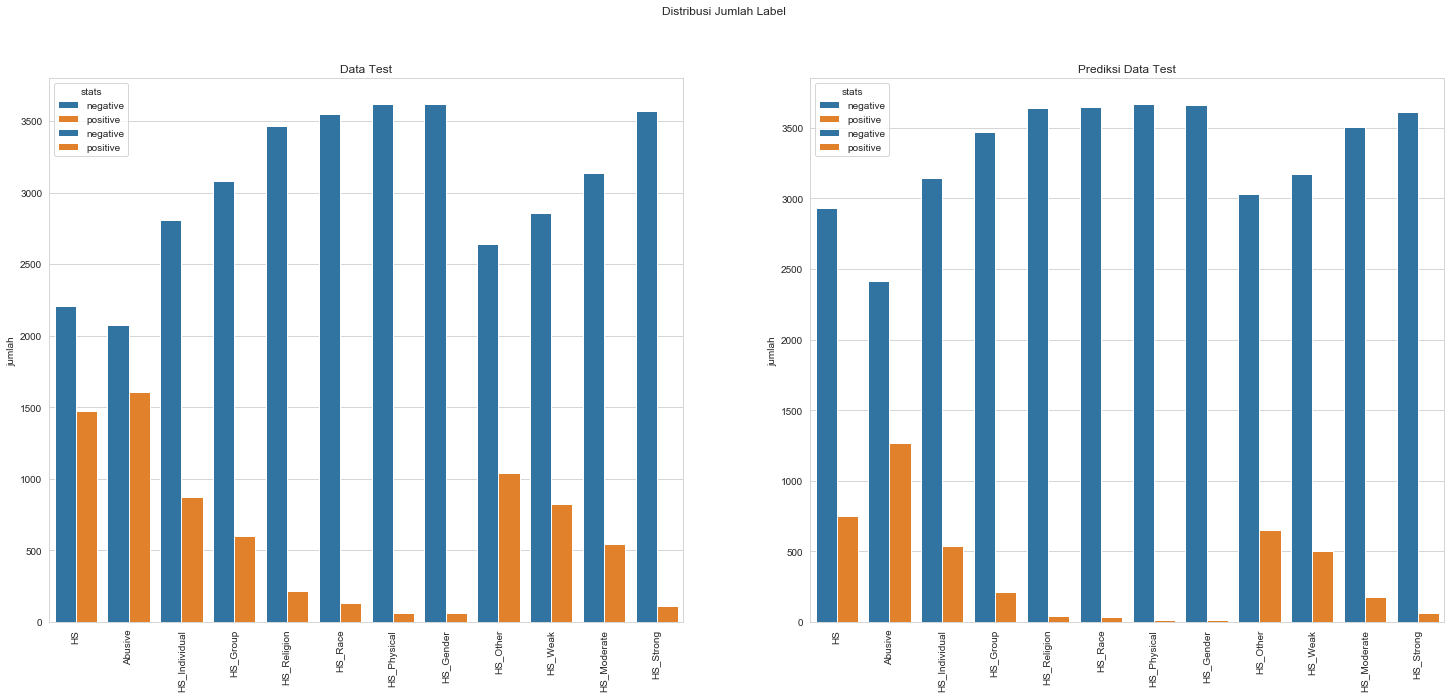

In [145]:
plt.figure(figsize=(25,10))
plt.suptitle('Distribusi Jumlah Label')

plt.subplot(1,2,1)
sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_test).set_xticklabels(sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_test).get_xticklabels(),rotation=90)
plt.title("Data Test")
plt.xlabel('')

plt.subplot(1,2,2)
sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_test_predict).set_xticklabels(sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_test_predict).get_xticklabels(),rotation=90)
plt.title("Prediksi Data Test")
plt.xlabel('')

plt.show()

In [146]:
pd.DataFrame({
    "label" : data_test_trans_nostemstop.columns[2:-1],
    "negative (true)" : dat_anls_test[dat_anls_test['stats'] == "negative"]["jumlah"].values,
    "positive (true)" : dat_anls_test[dat_anls_test['stats'] == "positive"]["jumlah"].values,
    "negative (predict)" : dat_anls_test_predict[dat_anls_test_predict['stats'] == "negative"]["jumlah"].values,
    "positive (predict)" : dat_anls_test_predict[dat_anls_test_predict['stats'] == "positive"]["jumlah"].values
})

,label,negative (true),positive (true),negative (predict),positive (predict)
0,HS,2204,1476,2933,747
1,Abusive,2075,1605,2413,1267
2,HS_Individual,2806,874,3143,537
3,HS_Group,3078,602,3470,210
4,HS_Religion,3467,213,3641,39
5,HS_Race,3551,129,3647,33
6,HS_Physical,3617,63,3668,12
7,HS_Gender,3616,64,3664,16
8,HS_Other,2643,1037,3031,649
9,HS_Weak,2854,826,3176,504


- **OOV Check**

In [147]:
join_data_test = data_test_trans_nostopword.join(data_test_predict.drop(['Tweet','Tweet_Parsed'],axis=1),rsuffix="_predict")

In [148]:
miss_exact_tweet_test = join_data_test[(join_data_test["HS"]!=join_data_test["HS_predict"]) | (join_data_test["Abusive"] != join_data_test["Abusive_predict"]) | (join_data_test["HS_Individual"] != join_data_test["HS_Individual_predict"]) | (join_data_test["HS_Group"] != join_data_test["HS_Group_predict"]) | (join_data_test["HS_Religion"] != join_data_test["HS_Religion_predict"]) | (join_data_test["HS_Race"] != join_data_test["HS_Race_predict"]) | (join_data_test["HS_Physical"] != join_data_test["HS_Physical_predict"]) | (join_data_test["HS_Gender"] != join_data_test["HS_Gender_predict"]) | (join_data_test["HS_Other"] != join_data_test["HS_Other_predict"]) | (join_data_test["HS_Weak"] != join_data_test["HS_Weak_predict"]) | (join_data_test["HS_Moderate"] != join_data_test["HS_Moderate_predict"]) | (join_data_test["HS_Strong"] != join_data_test["HS_Strong_predict"])]

In [149]:
oov_test = oov(fitur_trans_nostopword, generate_ngrams(miss_exact_tweet_test['Tweet_Parsed']))
oov_test_count = oov_count(oov_test)

In [150]:
sorted(oov_test_count.items(), reverse=True, key=lambda item: item[1])

[('', 1149),
 ('x', 10),
 ('i', 6),
 ('e', 5),
 ('c', 4),
 ('o', 4),
 ('v', 4),
 ('b', 4),
 ('a', 4),
 ('cabik', 4),
 ('ekspos', 4),
 ('hamzah', 4),
 ('kaligrafi', 4),
 ('surup', 3),
 ('didih', 3),
 ('r', 3),
 ('bah', 3),
 ('ceplos', 3),
 ('tg', 3),
 ('akrobat', 3),
 ('bandit', 3),
 ('punggung', 3),
 ('jak', 3),
 ('exol', 3),
 ('sb', 3),
 ('mulyani', 3),
 ('rumpi', 3),
 ('paria', 3),
 ('minangkabau', 3),
 ('paskah', 3),
 ('leste', 3),
 ('undur', 3),
 ('twinks', 3),
 ('green', 2),
 ('tea', 2),
 ('karbitan', 2),
 ('ekstrimis', 2),
 ('praktis', 2),
 ('tirani', 2),
 ('dai', 2),
 ('tokek', 2),
 ('vicuw', 2),
 ('padah', 2),
 ('paloi', 2),
 ('becky', 2),
 ('ijazah', 2),
 ('bundar', 2),
 ('tenggorok', 2),
 ('sigap', 2),
 ('tinju', 2),
 ('k', 2),
 ('afreen', 2),
 ('rintik', 2),
 ('metromini', 2),
 ('nali', 2),
 ('aki', 2),
 ('drive', 2),
 ('bonsai', 2),
 ('uwel', 2),
 ('jokower', 2),
 ('garang', 2),
 ('tumben', 2),
 ('morat', 2),
 ('marit', 2),
 ('sulap', 2),
 ('ur', 2),
 ('munawar', 2),
 ('pop

In [151]:
print("number of OOV words : ", len(oov_test))
print("number of unique OOV words : ", len(oov_test_count))

number of OOV words :  2243
number of unique OOV words :  934


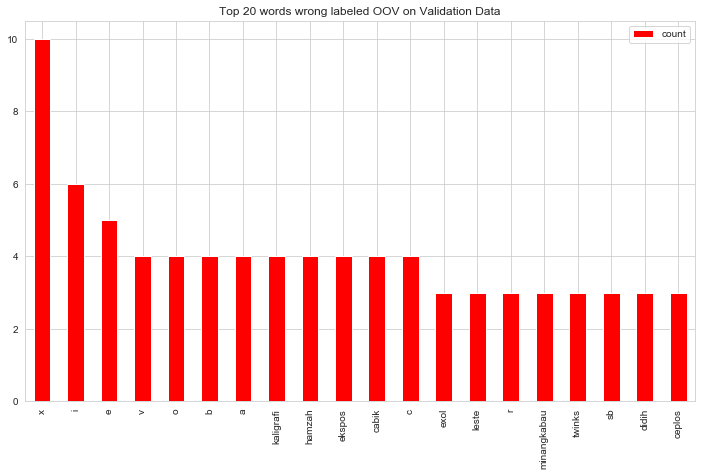

In [152]:
df_oov_test = pd.DataFrame(oov_test_count.items(),columns=["Tweet","count"])
df_oov_test.sort_values(['count'],ascending=False)[1:21].plot(
    kind='bar', y='count',x='Tweet', color='red', title='Top 20 words wrong labeled OOV on Validation Data', figsize=(12,7))
plt.xlabel("")
plt.show()

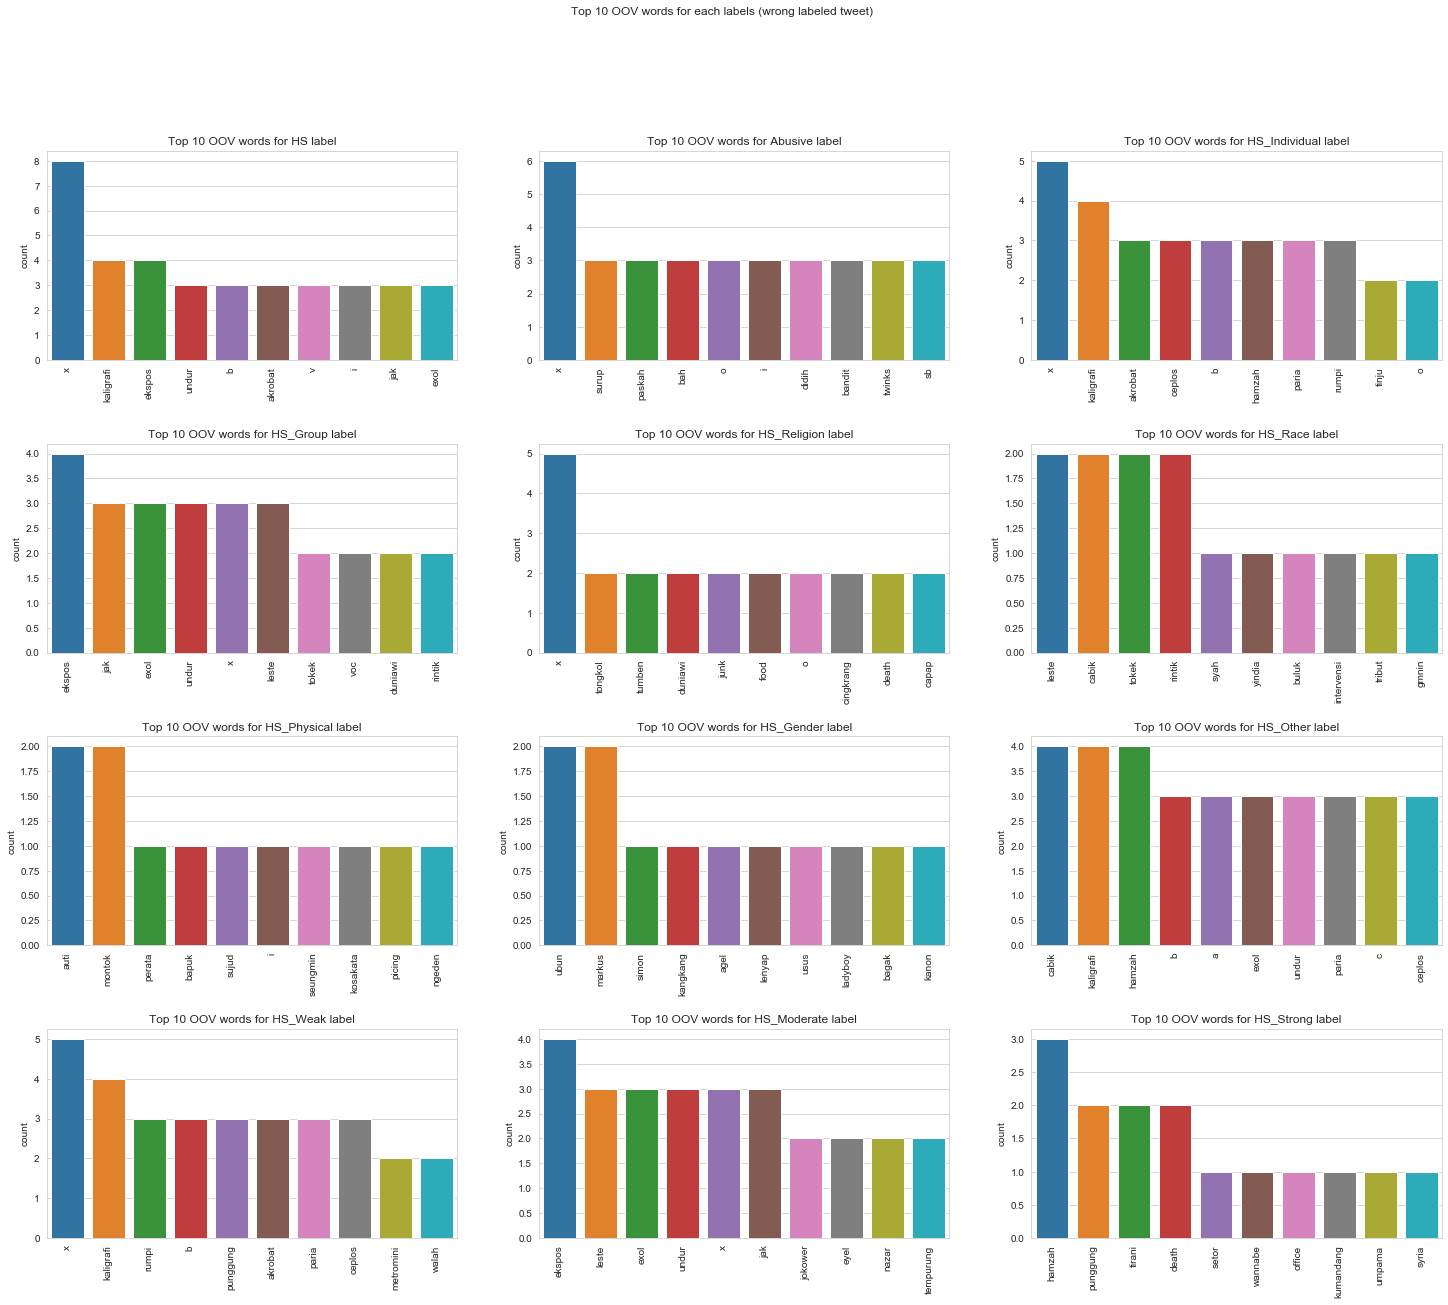

In [153]:
plt.figure(figsize=(25,20))
plt.suptitle('Top 10 OOV words for each labels (wrong labeled tweet)')
for i in range (len(target)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(hspace=0.4)
    wrongtweet = join_data_test[join_data_test[target[i]]!=join_data_test[target[i]+str("_predict")]]
    wrongtoken = generate_ngrams(wrongtweet['Tweet_Parsed']).tolist()
    wrong_oov = oov(fitur_trans_nostopword, wrongtoken)
    wrong_oov_count = oov_count(wrong_oov)
    frame = pd.DataFrame(wrong_oov_count.items(),columns=["Tweet","count"])
    frame = frame.sort_values(['count'],ascending=False)[1:11]
    sns.barplot(x="Tweet", y="count", data=frame).set_xticklabels(sns.barplot(x="Tweet", y="count", data=frame).get_xticklabels(),rotation=90)
    title='Top 10 OOV words for '+str(target[i])+" label"
    plt.title(title)
    plt.xlabel("")

- **Tweet Check**

In [154]:
len(miss_exact_tweet_test['Tweet'].values.tolist())

1268

In [155]:
miss_exact_tweet_test['Tweet'].values.tolist()

["GANTENG TAPI BERENGSEK!!! BUAT APA?!!\nWHO DO YOU THINK YOU ARE? YOU'RE NOTHING!! TO ME! << REMEMBER THIS!!",
 "USER USER Karena partaimu pdip itu bajingan'",
 "USER Khan yg ngajarin si garong kafir'",
 "USER Anak pecun... ga jauh2 dr hobi zina.. haha'",
 "Hamdalah. Kelar juga ini fitur keparat.'",
 "USER Jancuk! Pingin gue tabok itu anak'",
 "USER Kelemahan gerindra itu ada di orang ini,...Prabowo turun elektabilitasnya karena CONGOR fadlizon spt DURNO'",
 '#MataNajwaDebatJakarta lucu banget jawaban ahok.. gak nyambung. Ditanya apa di jawab apa. Kena skak mat d pertanyaan isu agama tdi. Dasar cina tolol hahaha',
 "USER Astagaaa.. Sewa pecun skalian ga pak?'",
 'When you cheat and "win" you\'ve distinguished yourself as a LOSER!  #ShameOnYouMalaysia #SEAGames2017',
 'Why doe your bio. Look so fake? Are you a liar? Why are you such a liar? Nobody likes a liar. You should be proud of who you are. Stop lying',
 "educate your self a lil before saying things like this. Upin Ipin movie and

In [156]:
miss_exact_tweet_test['Tweet_Parsed'].values.tolist()

['ganteng tapi berengsek buat apa  kamu pikir kamu adalah kamu tidak ada  ingat ini',
 'guna guna karena partai partai demokrasi indonesia juang itu bajing',
 'guna  tanya  garong kafir',
 'guna anak pecun tidak jauh dari hobi zina ',
 'hamdalah selesai juga ini fitur keparat',
 'guna jancuk ingin aku tabok itu anak',
 'guna lemah gerindra itu ada di orang ini prabowo turun elektabilitasnya karena congor fadli zon seperti durno',
 'mata najwa debat jakarta lucu banget jawab ahok tidak sambung tanya apa  ada jawab apa kena sekak mat di tanya masalah agama dasar cina tolol ',
 'guna astaga sewa pecun sekali tidak pak',
 'saat kamu tipu dan menang kamu telah beda diri bagai orang cundang dalam game laut malaysia ',
 'mengapa anda laku bio lihat sangat palsu apakah anda bohong mengapa anda bohong seperti itu tidak ada  suka bohong anda harus bangga dengan siapa anda henti bohong',
 'didik diri anda sedikit belum kata pikir seperti ini film ipin upin dan munafik laku dengan baik di sini itu

In [158]:
miss_exact_tweet_test.iloc[:,2:-13].columns

Index(['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race',
       'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate',
       'HS_Strong'],
      dtype='object')

In [159]:
# real label
miss_exact_tweet_test.iloc[:,2:-13].values.tolist()

[[1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 [1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0,

In [160]:
miss_exact_tweet_test.iloc[:,-12:].values.tolist()

[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0,